In [1]:
import os
import sys
"""Windows
os.chdir("c:/Work/WORK_PACKAGE/Demand_forecasting/github/DeepAR-pytorch/My_model/2_freq_nbinom_LSTM")
"""

"""Linux"""
os.chdir("/home/optimusprime/Desktop/peeterson/github/DeepAR_demand_prediction/2_freq_nbinom_LSTM")
sys.path.append(os.path.abspath(os.path.join("/home/optimusprime/Desktop/peeterson/github/DeepAR_demand_prediction/2_freq_nbinom_LSTM")))


"""colab
os.chdir('/content/drive/MyDrive/DeepAR_demand_prediction-linux-gpu/2_freq_nbinom_LSTM')
"""

#from ctypes import FormatError
import numpy as np

import warnings
warnings.filterwarnings("ignore")

import os,sys

# sys.path.append(os.path.abspath(os.path.join('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\\2_freq_nbinom_LSTM')))

# sys.path.append(os.path.abspath(os.path.join('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\\2_freq_nbinom_LSTM\\1_cluster_demand_prediction\data\weather_data')))
# sys.path.append(os.path.abspath(os.path.join('C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\2_freq_nbinom_LSTM\1_cluster_demand_prediction\data\demand_data')))

import torch
torch.use_deterministic_algorithms(True)
import pytorch_lightning as pl
from pytorch_forecasting.data.encoders import TorchNormalizer
from pytorch_forecasting.metrics import SMAPE, RMSE
from torchmetrics import R2Score, SymmetricMeanAbsolutePercentageError, MeanSquaredError

import matplotlib.pyplot as plt
import pandas as pd
from pytorch_forecasting.data import TimeSeriesDataSet
from pytorch_forecasting.data.encoders import NaNLabelEncoder
from pytorch_lightning.callbacks import EarlyStopping, LearningRateMonitor
import torch
from pytorch_forecasting.data.encoders import TorchNormalizer
import os,sys
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf,pacf
from scipy.signal import find_peaks
import operator
import statsmodels.api as sm
from itertools import combinations
import pickle
from pytorch_forecasting import Baseline
import random
from pytorch_forecasting import DeepAR,NegativeBinomialDistributionLoss
from itertools import product
from sklearn.metrics import mean_absolute_error, mean_squared_error
import optuna
from optuna.trial import TrialState
import plotly
#from deepar_RegionWise_LinuxGpu_prediction_dev import train_and_forecast
from sklearn.metrics import classification_report

"""
Set Random seed
"""

random.seed(0)
torch.manual_seed(0)
np.random.seed(0)
## additional seeding to ensure reproduciblility.
pl.seed_everything(0)

"""windows
os.chdir("c:/Work/WORK_PACKAGE/Demand_forecasting/github/DeepAR-pytorch/My_model/2_freq_nbinom_LSTM/1_cluster_demand_prediction")
"""




Global seed set to 0


'windows\nos.chdir("c:/Work/WORK_PACKAGE/Demand_forecasting/github/DeepAR-pytorch/My_model/2_freq_nbinom_LSTM/1_cluster_demand_prediction")\n'

In [2]:
def train_and_forecast(neurons,layers,batch_size,learning_rate,dropout,encoder_length,max_epochs,region,full_train_data,val_data,test_data,full_train_datetime, test_datetime,season_len,num_past_seas):

    import os,sys
    """ Linux"""
    os.chdir("/home/optimusprime/Desktop/peeterson/github/DeepAR_demand_prediction/2_freq_nbinom_LSTM/1_cluster_demand_prediction/model/standalone")
    sys.path.append(os.path.abspath(os.path.join("/home/optimusprime/Desktop/peeterson/github/DeepAR_demand_prediction/2_freq_nbinom_LSTM/1_cluster_demand_prediction/model/standalone")))
    

    """ colab 
    os.chdir('/content/drive/MyDrive/DeepAR_demand_prediction-linux-gpu/2_freq_nbinom_LSTM/1_cluster_demand_prediction/model/standalone')
    """

    import json    
    from sklearn.metrics import mean_absolute_error, mean_squared_error,confusion_matrix,ConfusionMatrixDisplay
    from sklearn.metrics import confusion_matrix
    import seaborn as sn

    """
    Set Random seed
    """
    torch.use_deterministic_algorithms(True)
    random.seed(0)
    torch.manual_seed(0)
    np.random.seed(0)
    ## additional seeding to ensure reproduciblility.
    pl.seed_everything(0)

    Target = 'target'

    print(list(full_train_data.columns))

    """
    set inputs here
    (hyperparameters grid search)

    """
    ######### Network Architecture definition ###################

    ###### Create hyperparameters grid ###### 
    pred_len = 1
    hparams_grid = {"LSTM_neuron_size":[neurons],
                    "num_layers":[layers],
                    "batch_size":[batch_size],
                    "learning_rate":[learning_rate],
                    "max_encoder_length":[encoder_length],
                    "max_prediction_length":[pred_len],
                    "dropout":[dropout],
                    #"cov_pair":cov_pairs_list,# [cov_pairs_list[7]],
                    "Num_epochs":[max_epochs]}#[18,20,22,24,26,28,30]}
                    #"Num_epochs":[16,18,20,22,24,26,28]}
    
    ###### Create hyperparameters grid ###### 

    p = 6 # patience no. of epochs
    Loss=NegativeBinomialDistributionLoss()
    ######### Network Architecture definition ###################


    ######### Training Routine ###################
    fdv_steps = 10 # fast_dev_run
    ######### Training Routine ###################


    """
    Full Training Routine 
    with hyperparmeter grid search

    Load data into TimeSeriesDataSet object

    for fast development run
    uncomment fast_dev_run = fdv_steps

    """
    #early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-8, patience=p, verbose=False, mode="min")
    lr_logger = LearningRateMonitor()

    RMSE_list = [] # FIND minimum RMSE case
    hyperparams_list = [] # FIND minimum RMSE case

    num_cols_list = []

    cat_dict = {"_hour_of_day": NaNLabelEncoder(add_nan=True).fit(full_train_data._hour_of_day), \
    "_day_of_week": NaNLabelEncoder(add_nan=True).fit(full_train_data._day_of_week), "_day_of_month" : NaNLabelEncoder(add_nan=True).fit(full_train_data._day_of_month), "_day_of_year" : NaNLabelEncoder(add_nan=True).fit(full_train_data._day_of_year), \
        "_week_of_year": NaNLabelEncoder(add_nan=True).fit(full_train_data._week_of_year), "_month_of_year": NaNLabelEncoder(add_nan=True).fit(full_train_data._month_of_year) ,"_year": NaNLabelEncoder(add_nan=True).fit(full_train_data._year) }
    cat_list = ["_hour_of_day","_day_of_week","_day_of_month","_day_of_year","_week_of_year","_month_of_year","_year"]  

    num_cols_list = list(full_train_data.columns[3:-7]) 

    # param_comb_cnt=-1
    for neu,lay,bat,lr,enc_len,pred_len,drop,num_ep in product(*[x for x in hparams_grid.values()]):
            
        ######### Load DATA #############
        full_train_dataset = TimeSeriesDataSet(
            full_train_data,
            time_idx="time_idx",
            target=Target,
            categorical_encoders=cat_dict,
            group_ids=["group"],
            min_encoder_length=enc_len,
            max_encoder_length=enc_len,
            min_prediction_length=pred_len,
            max_prediction_length=pred_len,
            time_varying_unknown_reals=[Target],
            time_varying_known_reals=num_cols_list,
            time_varying_known_categoricals=cat_list,
            add_relative_time_idx=False,
            randomize_length=False,
            scalers={},
            target_normalizer=TorchNormalizer(method="identity",center=False,transformation=None )
        )

        val_dataset = TimeSeriesDataSet.from_dataset(full_train_dataset,val_data, stop_randomization=True, predict=False)
        test_dataset = TimeSeriesDataSet.from_dataset(full_train_dataset,test_data, stop_randomization=True)

        full_train_dataloader = full_train_dataset.to_dataloader(train=True, )
        val_dataloader = val_dataset.to_dataloader(train=False,  )
        test_dataloader = test_dataset.to_dataloader(train=False, )
        ######### Load DATA #############


        """
        Machine Learning predictions START
        1) DeepAR

        """
        trainer = pl.Trainer(
            max_epochs=num_ep,
            gpus=-1, #-1
            auto_lr_find=False,
            gradient_clip_val=0.1,
            limit_train_batches=1.0,
            limit_val_batches=1.0,
            #fast_dev_run=fdv_steps,
            logger=True,
            #log_every_n_steps=10,
            # profiler=True,
            callbacks=[lr_logger]#, early_stop_callback],
            #enable_checkpointing=True,
            #default_root_dir="C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\2_freq_nbinom_LSTM\1_cluster_demand_prediction\logs"
        )


        #print(f"training routing:\n \n {trainer}")
        deepar = DeepAR.from_dataset(
            full_train_dataset,
            learning_rate=lr,
            hidden_size=neu,
            rnn_layers=lay,
            dropout=drop,
            loss=Loss,
            log_interval=20,
            log_val_interval=1.0,
            log_gradient_flow=False,
            # reduce_on_plateau_patience=3,
        )

            
        #print(f"Number of parameters in network: {deepar.size()/1e3:.1f}k")
        # print(f"Model :\n \n {deepar}")
        #torch.set_num_threads(10)
        trainer.fit(
            deepar,
            train_dataloaders=full_train_dataloader,
            val_dataloaders=val_dataloader,
        )

        """ 
        ########## DEEPAR Prediction #####################
        """
        ########## DEEPAR Prediction #####################
        test_output = deepar.predict(data=test_dataloader,mode='prediction',return_index=True,num_workers=8,show_progress_bar=True)

        ## test_output data structure ##
        ## test_output = [ [x,x,x,x,x,...], [ {'time_idx': [x,x,x,x,x,...] , 'group': [x,x,x,x,x,...]} ]  ]
        ## len(test_output[0]) includes all the groups combined

        actual = {}
        prediction = {}

        for i in range(len(test_output[0])):
            time_idx_i = test_output[1]['time_idx'][i]
            grp_i = test_output[1]['group'][i]

            actual[(time_idx_i,grp_i)] = test_data[(test_data['time_idx'] == time_idx_i) & (test_data['group'] == grp_i)]['target'].values[0]
            prediction[(time_idx_i,grp_i)] = test_output[0][i]

        groups_list = np.unique(test_output[1]['group'])
        time_idx_list = np.unique(test_output[1]['time_idx'])

        deepar_RMSE_grp_dict = {}
        deepar_actuals_grp_dict = {}
        deepar_predictions_grp_dict = {}

        for grp in groups_list:
            actuals_grp_list = []
            predictions_grp_list = []
            for t in time_idx_list:
                actuals_grp_list.append( int(actual[(t,grp)] ))
                predictions_grp_list.append(int(prediction[(t,grp)]))

            deepar_actuals_grp_dict[str(grp)] = actuals_grp_list
            deepar_predictions_grp_dict[str(grp)] = predictions_grp_list

            plt.figure(figsize=(25,5))
            plt.title('DEEPAR: line plot, cluster: '+str(grp))  
            plt.plot(actuals_grp_list,'^-')
            plt.plot(predictions_grp_list,'*-')
            plt.show()

            plt.xlabel('actual')
            plt.ylabel('prediction')
            plt.title('DEEPAR: scatter plot, cluster: '+str(grp))       
            plt.scatter(actuals_grp_list,predictions_grp_list )
            plt.show()

            # cm = confusion_matrix(actuals_grp_list,predictions_grp_list)
            # max_classes = min(len(np.unique(actuals_grp_list)),len(np.unique(predictions_grp_list)))
            # df_cm = pd.DataFrame(cm, index = [i for i in range(max_classes)],
            #                 columns = [i for i in range(max_classes)])
            # plt.figure(figsize = (10,7))      
            # s = sn.heatmap(df_cm, annot=True, )
            # s.set(xlabel='Predicted-Label', ylabel='True-Label',title='DEEPAR: cluster: '+str(grp))
            max_classes = max(np.unique(actuals_grp_list)[-1], np.unique(predictions_grp_list)[-1])
            cm = confusion_matrix(actuals_grp_list, predictions_grp_list, labels=range(max_classes))
            disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(max_classes))
            disp.plot()
            plt.title('DEEPAR: cluster: '+str(grp))
            plt.show()

            deepar_RMSE_grp_dict[str(grp)] = np.sqrt( mean_squared_error( np.array(actuals_grp_list) , np.array(predictions_grp_list) )   )
            print(f'DEEPAR: RMSE from cluster: {grp} = {deepar_RMSE_grp_dict[str(grp)]}')
            print(f'\nDEEPAR: PRECISION, RECALL & F1 scores for cluster: {grp} = {classification_report(actuals_grp_list,predictions_grp_list)}\n')

        total_actual_list = []
        total_prediction_list = []
        for k in actual.keys():
            total_actual_list.append(int(actual[(k[0],k[1])]))
            total_prediction_list.append(int(prediction[(k[0],k[1])] ))

        # cm = confusion_matrix(total_actual_list,total_prediction_list)
        # max_classes = min(len(np.unique(total_actual_list)),len(np.unique(total_prediction_list)))
        # df_cm = pd.DataFrame(cm, index = [i for i in range(max_classes)],
        #                 columns = [i for i in range(max_classes)])
        # plt.figure(figsize = (10,7))      
        # s = sn.heatmap(df_cm, annot=True, )
        # s.set(xlabel='Predicted-Label', ylabel='True-Label',title='DEEPAR, Region Total: '+str(region))
        max_classes = max(np.unique(total_actual_list)[-1], np.unique(total_prediction_list)[-1])
        cm = confusion_matrix(total_actual_list, total_prediction_list, labels=range(max_classes))
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(max_classes))
        disp.plot()
        plt.title('DEEPAR: Region: '+region)
        plt.show()

        Total_rmse = np.sqrt( mean_squared_error( np.array(total_actual_list) , np.array(total_prediction_list) )   )
        print('DEEPAR: Total RMSE from all clusters: ',Total_rmse)
        print(f'\nDEEPAR: PRECISION, RECALL & F1 scores for Region: {region} = {classification_report(total_actual_list,total_prediction_list)}\n')

        print('\n Hyperparameters: neu,lay,bat,lr,enc_len,pred_len,drop,\n')
        print(neu,lay,bat,lr,enc_len,pred_len,drop,' \n')

        ########## DEEPAR Prediction #####################
        """
        Machine Learning predictions END
        """


        """ 
        ########## HISTORIC AVERAGE Prediction #####################
        """
        ########## HA Prediction #####################
        #TODO: merge full_train_data and test_data to do historic average predictions

        full_train_data['datetime'] = full_train_datetime
        test_data['datetime'] = test_datetime
        entire_data =  pd.concat([full_train_data,test_data]).sort_values(by=['group','datetime']).reset_index(drop=True)  

        ha_RMSE_grp_dict = {}
        ha_actuals_grp_dict = {}
        ha_predictions_grp_dict = {}

        total_actual_list = []
        total_prediction_list = []

        for grp in groups_list:
            err_list = np.array([])
            actuals_grp_list = []
            predictions_grp_list = []
            for t in time_idx_list:
                actuals_grp_list.append( int(test_data[(test_data['time_idx'] == t) & (test_data['group'] == grp)]['target'].values[0]) )

                dt = test_data[ (test_data['time_idx'] == t) & (test_data['group'] == grp) ]['datetime']
                hist = [ entire_data[(entire_data['group']== grp) & (entire_data['datetime'] == (dt - pd.Timedelta(hour, "h")).values[0])]['target'].values for hour in range(season_len,season_len*num_past_seas,season_len) ]
                predictions_grp_list.append(int(np.mean(hist)))

            plt.figure(figsize=(25,5))
            plt.title('HA: line plot, cluster: '+str(grp))  
            plt.plot(actuals_grp_list,'^-')
            plt.plot(predictions_grp_list,'*-')
            plt.show()

            ha_actuals_grp_dict[str(grp)] = actuals_grp_list
            ha_predictions_grp_dict[str(grp)] = predictions_grp_list

            ha_RMSE_grp_dict[str(grp)] = np.sqrt( mean_squared_error( np.array(actuals_grp_list) , np.array(predictions_grp_list) )   )
            print(f'HA: RMSE from cluster: {grp} = {ha_RMSE_grp_dict[str(grp)]}')
            print(f'\nHA: PRECISION, RECALL & F1 scores for cluster: {grp} = {classification_report(actuals_grp_list,predictions_grp_list)}\n')

            total_actual_list.append(actuals_grp_list)
            total_prediction_list.append(predictions_grp_list)

        tot_actual_flat_arr = np.array(total_actual_list).flatten()
        tot_prediction_flat_arr = np.array(total_prediction_list).flatten()

        Total_rmse = np.sqrt( mean_squared_error( tot_actual_flat_arr , tot_prediction_flat_arr )  )
        print('HA: Total RMSE from all clusters: ',Total_rmse)
        print(f'\HA: PRECISION, RECALL & F1 scores for Region: {region} = {classification_report(tot_actual_flat_arr,tot_prediction_flat_arr)}\n')

        ########## HA Prediction #####################




    ############### Saving Results and optimal hyperparameters ########################
    """
    SAVE all results and hparams to json files for dashboard visualization

    """
    results_dict = {"actuals_dem":deepar_actuals_grp_dict,"all_clstrs_deepar_pred":deepar_predictions_grp_dict, "all_clstrs_hist_avg":ha_predictions_grp_dict}
    results_dict["best_deepar_hyperparams"] = {"neu":neurons,"lay":layers,"bat":batch_size,"lr":learning_rate,"drop":dropout,"enc_len":encoder_length}
    results_dict["RMSE_DAR"] = deepar_RMSE_grp_dict
    results_dict["HA_RMSE"] = ha_RMSE_grp_dict
    """ linux """
    os.chdir("/home/optimusprime/Desktop/peeterson/github/DeepAR_demand_prediction/2_freq_nbinom_LSTM/1_cluster_demand_prediction/data/results_data")


    """ colab 
    os.chdir('/content/drive/MyDrive/DeepAR_demand_prediction-linux-gpu/2_freq_nbinom_LSTM/1_cluster_demand_prediction/data/results_data')
    """
    # Serializing json
    def np_encoder(object):
        if isinstance(object, np.generic):
            return object.item()
    json_object = json.dumps(results_dict, indent=4, default=np_encoder)
    # Writing to .json
    with open(region+".json", "w") as outfile:
        outfile.write(json_object)
    ############### Saving Results and optimal hyperparameters ########################

    return



In [3]:
"""
set inputs here
(hyperparameters grid search)

"""

######### MISCELLANEOUS ###################
region ="Tampines"
cov_lag_len= 0 #we can use forecasted values, even for inflow
Target = 'target'
encoder_length = 18
######### MISCELLANEOUS ###################


######### Network Architecture ###################
p = 10 # patience no. of epochs

Loss=NegativeBinomialDistributionLoss()

######### Network Architecture ###################


######### Training Routine ###################
fdv_steps = 10 # fast_dev_run
######### Training Routine ###################


############## Inputs for 2) Persistance model ( seasonal naive forecast ) #######################
season_len = 164 # length of season
num_past_seas = 6 # number of past seasons to use in averaging
#seas_pred_strt_idx = 2035 # seasonal naive forecast start index, in hours use the df dataframe
############## Inputs for 2) Persistance model ( seasonal naive forecast ) #######################


In [4]:
"""Linux"""
os.chdir("/home/optimusprime/Desktop/peeterson/github/DeepAR_demand_prediction/2_freq_nbinom_LSTM/1_cluster_demand_prediction/data/demand_data/standalone/region_level/train_val_test_data")


""" colab 
os.chdir('/content/drive/MyDrive/DeepAR_demand_prediction-linux-gpu/2_freq_nbinom_LSTM/1_cluster_demand_prediction/data/demand_data/standalone/region_level/train_val_test_data')
"""
"""
Import pre-processed Data

response and target are the same thing
"""
all_clstr_train_dem_data = pd.read_csv(region+'_all_clstr_train_dem_data.csv')
all_clstr_full_train_dem_data = pd.read_csv(region+'_all_clstr_full_train_dem_data.csv')

all_clstr_val_dem_data = pd.read_csv(region+'_all_clstr_val_dem_data.csv')
all_clstr_test_dem_data = pd.read_csv(region+'_all_clstr_test_dem_data.csv')

train_data = all_clstr_train_dem_data
full_train_data = all_clstr_full_train_dem_data
val_data = all_clstr_val_dem_data
test_data = all_clstr_test_dem_data


In [5]:
train_data

,time_idx,datetime,group,target,inflow,inflow_lag168,inflow_lag336,outflow_lag168,outflow_lag336,inflow_diff1_per1,...,inflow_diff2_per1__partial_autocorrelation__lag_2,"inflow_diff2_per1__fft_coefficient__attr_""real""__coeff_1",inflow_diff2_per1__skewness,inflow_diff2_per1__kurtosis,inflow_diff2_per1__longest_strike_below_mean,inflow_diff2_per1__partial_autocorrelation__lag_1,inflow_diff2_per1__autocorrelation__lag_1,inflow_diff2_per1__mean,inflow_diff2_per1__sum_values,"inflow_diff2_per1__fft_coefficient__attr_""real""__coeff_0"
0,336,2021-10-08 00:00:00,160,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,-0.530444,0.106416,-0.548952,0.841539,0.0,-0.644841,-0.644841,0.00,0.0,0.0
1,337,2021-10-08 01:00:00,160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.530444,0.000000,-0.548952,0.841539,0.0,-0.644841,-0.644841,0.00,0.0,0.0
2,338,2021-10-08 02:00:00,160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.530444,0.000000,0.000000,0.841539,0.0,-0.644841,-0.644841,0.00,0.0,0.0
3,339,2021-10-08 03:00:00,160,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.530444,0.000000,2.000000,4.000000,3.0,-0.111111,-0.111111,0.25,1.0,1.0
4,340,2021-10-08 04:00:00,160,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,...,-0.530444,-1.427051,-1.293234,2.916667,1.0,-0.479167,-0.479167,-0.20,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13987,1603,2021-11-29 19:00:00,170,1.0,1.0,1.0,0.0,0.0,2.0,1.0,...,-0.231270,0.711465,-1.083028,0.790053,7.0,-0.695849,-0.695849,0.04,1.0,1.0
13988,1604,2021-11-29 20:00:00,170,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,-0.319976,-0.303356,-0.928873,0.279489,1.0,-0.710227,-0.710227,0.00,0.0,0.0
13989,1605,2021-11-29 21:00:00,170,0.0,1.0,1.0,2.0,0.0,0.0,0.0,...,-0.174149,-1.267700,-0.914687,0.385837,1.0,-0.644163,-0.644163,-0.04,-1.0,-1.0
13990,1606,2021-11-29 22:00:00,170,0.0,0.0,2.0,0.0,0.0,0.0,-1.0,...,-0.173670,-0.183806,-0.836740,0.581467,1.0,-0.636574,-0.636574,0.00,0.0,0.0


In [6]:
#################### add date information ts ####################
train_data["datetime"] = pd.to_datetime(train_data["datetime"])
train_data['_hour_of_day'] = train_data["datetime"].dt.hour.astype(str)
train_data['_day_of_week'] = train_data["datetime"].dt.dayofweek.astype(str)
train_data['_day_of_month'] = train_data["datetime"].dt.day.astype(str)
train_data['_day_of_year'] = train_data["datetime"].dt.dayofyear.astype(str)
train_data['_week_of_year'] = train_data["datetime"].dt.weekofyear.astype(str)
train_data['_month_of_year'] = train_data["datetime"].dt.month.astype(str)
train_data['_year'] = train_data["datetime"].dt.year.astype(str)
#################### add date information ts ####################

#################### add date information ts ####################
full_train_data["datetime"] = pd.to_datetime(full_train_data["datetime"])
full_train_data['_hour_of_day'] = full_train_data["datetime"].dt.hour.astype(str)
full_train_data['_day_of_week'] = full_train_data["datetime"].dt.dayofweek.astype(str)
full_train_data['_day_of_month'] = full_train_data["datetime"].dt.day.astype(str)
full_train_data['_day_of_year'] = full_train_data["datetime"].dt.dayofyear.astype(str)
full_train_data['_week_of_year'] = full_train_data["datetime"].dt.weekofyear.astype(str)
full_train_data['_month_of_year'] = full_train_data["datetime"].dt.month.astype(str)
full_train_data['_year'] = full_train_data["datetime"].dt.year.astype(str)
#################### add date information ts ####################

#################### add date information ts ####################
val_data["datetime"] = pd.to_datetime(val_data["datetime"])
val_data['_hour_of_day'] = val_data["datetime"].dt.hour.astype(str)
val_data['_day_of_week'] = val_data["datetime"].dt.dayofweek.astype(str)
val_data['_day_of_month'] = val_data["datetime"].dt.day.astype(str)
val_data['_day_of_year'] = val_data["datetime"].dt.dayofyear.astype(str)
val_data['_week_of_year'] = val_data["datetime"].dt.weekofyear.astype(str)
val_data['_month_of_year'] = val_data["datetime"].dt.month.astype(str)
val_data['_year'] = val_data["datetime"].dt.year.astype(str)
#################### add date information ts ####################

#################### add date information ts ####################
test_data["datetime"] = pd.to_datetime(test_data["datetime"])
test_data['_hour_of_day'] = test_data["datetime"].dt.hour.astype(str)
test_data['_day_of_week'] = test_data["datetime"].dt.dayofweek.astype(str)
test_data['_day_of_month'] = test_data["datetime"].dt.day.astype(str)
test_data['_day_of_year'] = test_data["datetime"].dt.dayofyear.astype(str)
test_data['_week_of_year'] = test_data["datetime"].dt.weekofyear.astype(str)
test_data['_month_of_year'] = test_data["datetime"].dt.month.astype(str)
test_data['_year'] = test_data["datetime"].dt.year.astype(str)
#################### add date information ts ####################


#print(list(train_data.columns))

"""
CHecK for null values
"""

print("train_data has null values?",train_data.isnull().values.any())
print("train_data has null values?",full_train_data.isnull().values.any())
print("val_data has null values?",val_data.isnull().values.any())
print("test_data has null values?",test_data.isnull().values.any())

""" 
Drop datetime column
"""
train_datetime = train_data['datetime']
full_train_datetime = full_train_data['datetime']
val_datetime = val_data['datetime']
test_datetime = test_data['datetime']
train_data = train_data.drop(columns=['datetime'])
full_train_data = full_train_data.drop(columns=['datetime'])
val_data = val_data.drop(columns=['datetime'])
test_data = test_data.drop(columns=['datetime'])



train_data has null values? False
train_data has null values? False
val_data has null values? False
test_data has null values? False


In [7]:
# for c in train_data.columns[3:-7]:
#     print(c)

In [8]:

"""
Full Training Routine 
with bayesisan hyperparmeter search

Load data into TimeSeriesDataSet object

for fast development run
uncomment fast_dev_run = fdv_steps

"""

#early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-4, patience=p, verbose=False, mode="min")
lr_logger = LearningRateMonitor()


class MetricsCallback(pl.Callback):
    """PyTorch Lightning metric callback."""

    def __init__(self):
        super().__init__()
        self.metrics = []

    def on_validation_end(self, trainer, pl_module):
        self.metrics.append(trainer.callback_metrics)


def objective(trial,):  
  
  neu = trial.suggest_int(name="neu",low=600,high=800,step=25,log=False)
  lay = trial.suggest_int(name="lay",low=1,high=3,step=1,log=False)
  bat = trial.suggest_int(name="bat",low=4,high=12,step=4,log=False)
  lr = trial.suggest_float(name="lr",low=0.000001,high=0.01,log=True)
  num_ep = trial.suggest_int(name="num_ep",low=1,high=1,step=1,log=False)
  enc_len = encoder_length
  pred_len = 1
  drop = trial.suggest_float(name="dropout",low=0,high=0.4,step=0.1,log=False)


  num_cols_list = list(train_data.columns[3:-7])

  cat_dict = {"_hour_of_day": NaNLabelEncoder(add_nan=True).fit(train_data._hour_of_day), \
  "_day_of_week": NaNLabelEncoder(add_nan=True).fit(train_data._day_of_week), "_day_of_month" : NaNLabelEncoder(add_nan=True).fit(train_data._day_of_month), "_day_of_year" : NaNLabelEncoder(add_nan=True).fit(train_data._day_of_year), \
      "_week_of_year": NaNLabelEncoder(add_nan=True).fit(train_data._week_of_year), "_month_of_year": NaNLabelEncoder(add_nan=True).fit(train_data._month_of_year) ,"_year": NaNLabelEncoder(add_nan=True).fit(train_data._year) }
  cat_list = ["_hour_of_day","_day_of_week","_day_of_month","_day_of_year","_week_of_year","_month_of_year","_year"]  

  train_dataset = TimeSeriesDataSet(
      train_data,
      time_idx="time_idx",
      target=Target,
      categorical_encoders=cat_dict,
      group_ids=["group"],
      min_encoder_length=enc_len,
      max_encoder_length=enc_len,
      min_prediction_length=pred_len,
      max_prediction_length=pred_len,
      time_varying_unknown_reals=[Target],
      time_varying_known_reals=num_cols_list,
      time_varying_known_categoricals=cat_list,
      add_relative_time_idx=False,
      randomize_length=False,
      scalers={},
      target_normalizer=TorchNormalizer(method="identity",center=False,transformation=None )

  )

  val_dataset = TimeSeriesDataSet.from_dataset(train_dataset,val_data, stop_randomization=True, predict=False)

  train_dataloader = train_dataset.to_dataloader(train=True, batch_size=bat)
  val_dataloader = val_dataset.to_dataloader(train=False, batch_size=bat)
  ######### Load DATA #############


  """
  Machine Learning predictions START
  1) DeepAR 

  """

  metrics_callback = MetricsCallback()

  trainer = pl.Trainer(
      max_epochs=num_ep,
      gpus=-1, #-1
      auto_lr_find=False,
      gradient_clip_val=0.1,
      limit_train_batches=1.0,
      limit_val_batches=1.0,
      logger=True,
      val_check_interval=1.0,
      callbacks=[lr_logger,metrics_callback]
  )

  #print(f"training routing:\n \n {trainer}")
  deepar = DeepAR.from_dataset(
      train_dataset,
      learning_rate=lr,
      hidden_size=neu,
      rnn_layers=lay,
      dropout=drop,
      loss=Loss,
      log_interval=20,
      log_val_interval=6,
      log_gradient_flow=False,
      # reduce_on_plateau_patience=3,
  )


  torch.set_num_threads(10)
  trainer.fit(
      deepar,
      train_dataloaders=train_dataloader,
      val_dataloaders=val_dataloader,
  )


  metrics_list = [ metrics["val_RMSE"].item()  for metrics in  metrics_callback.metrics[1:]]

  #min_val_rmse_epoch = np.argmin(metrics_list)
  min_val_rmse = metrics_list[-1] #np.min(metrics_list)
  print('\n\n\nmin_val_rmse ',min_val_rmse,'\n\n\n\n')

  trial.report(min_val_rmse, num_ep)

  # Handle pruning based on the intermediate value.
  if trial.should_prune():
      raise optuna.exceptions.TrialPruned()

  return min_val_rmse


[I 2023-04-26 15:39:25,415] A new study created in memory with name: no-name-7c5afb3b-92e3-41f6-9c48-0343ce856fd2
/home/optimusprime/miniconda3/envs/deepar-gpu/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:467: LightningDeprecationWarning: Setting `Trainer(gpus=-1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=-1)` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(limit_train_batches=1.0)` was configured so 100% of the batches per epoch will be used..
`Trainer(limit_val_batches=1.0)` was configured so 100% of the batches will be used..
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you

Epoch 0: 100%|██████████| 4455/4455 [00:43<00:00, 103.08it/s, loss=0.711, v_num=40, train_loss_step=0.284, val_loss=0.845, train_loss_epoch=0.873]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 4455/4455 [00:43<00:00, 102.66it/s, loss=0.711, v_num=40, train_loss_step=0.284, val_loss=0.845, train_loss_epoch=0.873]


[I 2023-04-26 15:40:15,860] Trial 0 finished with value: 0.6005241870880127 and parameters: {'neu': 725, 'lay': 2, 'bat': 4, 'lr': 2.924116486316496e-05, 'num_ep': 1, 'dropout': 0.0}. Best is trial 0 with value: 0.6005241870880127.





min_val_rmse  0.6005241870880127 






/home/optimusprime/miniconda3/envs/deepar-gpu/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:467: LightningDeprecationWarning: Setting `Trainer(gpus=-1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=-1)` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(limit_train_batches=1.0)` was configured so 100% of the batches per epoch will be used..
`Trainer(limit_val_batches=1.0)` was configured so 100% of the batches will be used..
`Trainer(val_check_interval=1.0)` was configured so validation will run at the end of the training epoch..
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance

Epoch 0: 100%|██████████| 2228/2228 [00:27<00:00, 81.65it/s, loss=0.766, v_num=41, train_loss_step=0.766, val_loss=0.844, train_loss_epoch=0.826]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 2228/2228 [00:27<00:00, 81.06it/s, loss=0.766, v_num=41, train_loss_step=0.766, val_loss=0.844, train_loss_epoch=0.826]


[I 2023-04-26 15:40:44,157] Trial 1 finished with value: 0.6232091188430786 and parameters: {'neu': 625, 'lay': 3, 'bat': 8, 'lr': 0.0017933662192742296, 'num_ep': 1, 'dropout': 0.30000000000000004}. Best is trial 0 with value: 0.6005241870880127.





min_val_rmse  0.6232091188430786 




Study statistics: 
  Number of finished trials:  2
  Number of pruned trials:  0
  Number of complete trials:  2
Best trial:
  Value:  0.6005241870880127
  Params: 
    neu: 725
    lay: 2
    bat: 4
    lr: 2.924116486316496e-05
    num_ep: 1
    dropout: 0.0


Global seed set to 0


Best hyperparameters: {'neu': 725, 'lay': 2, 'bat': 4, 'lr': 2.924116486316496e-05, 'num_ep': 1, 'dropout': 0.0}
['time_idx', 'group', 'target', 'inflow', 'inflow_lag168', 'inflow_lag336', 'outflow_lag168', 'outflow_lag336', 'inflow_diff1_per1', 'inflow_diff1_per2', 'inflow_diff2_per1', 'inflow__fft_coefficient__attr_"real"__coeff_1', 'inflow__mean', 'inflow__fft_coefficient__attr_"real"__coeff_0', 'inflow__sum_values', 'inflow__count_below_mean', 'inflow__count_above_mean', 'inflow__standard_deviation', 'inflow__variance', 'inflow__absolute_sum_of_changes', 'inflow__maximum', 'inflow__skewness', 'inflow__longest_strike_above_mean', 'inflow__kurtosis', 'inflow__number_crossing_m__m_0', 'inflow__autocorrelation__lag_3', 'inflow__autocorrelation__lag_1', 'inflow__autocorrelation__lag_2', 'inflow__partial_autocorrelation__lag_1', 'inflow__partial_autocorrelation__lag_2', 'inflow__partial_autocorrelation__lag_3', 'inflow__longest_strike_below_mean', 'inflow_lag168__fft_coefficient__attr_"r

/home/optimusprime/miniconda3/envs/deepar-gpu/lib/python3.10/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:467: LightningDeprecationWarning:

Setting `Trainer(gpus=-1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=-1)` instead.

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
`Trainer(limit_train_batches=1.0)` was configured so 100% of the batches per epoch will be used..
`Trainer(limit_val_batches=1.0)` was configured so 100% of the batches will be used..
You are using a CUDA device ('NVIDIA GeForce RTX 4090') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmu

Epoch 0: 100%|██████████| 344/344 [00:13<00:00, 25.42it/s, loss=0.921, v_num=16, train_loss_step=0.829, val_loss=0.947, train_loss_epoch=0.939]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 344/344 [00:13<00:00, 25.16it/s, loss=0.921, v_num=16, train_loss_step=0.829, val_loss=0.947, train_loss_epoch=0.939]


Predict: 100%|██████████| 30/30 [00:08<00:00,  3.57 batches/s]


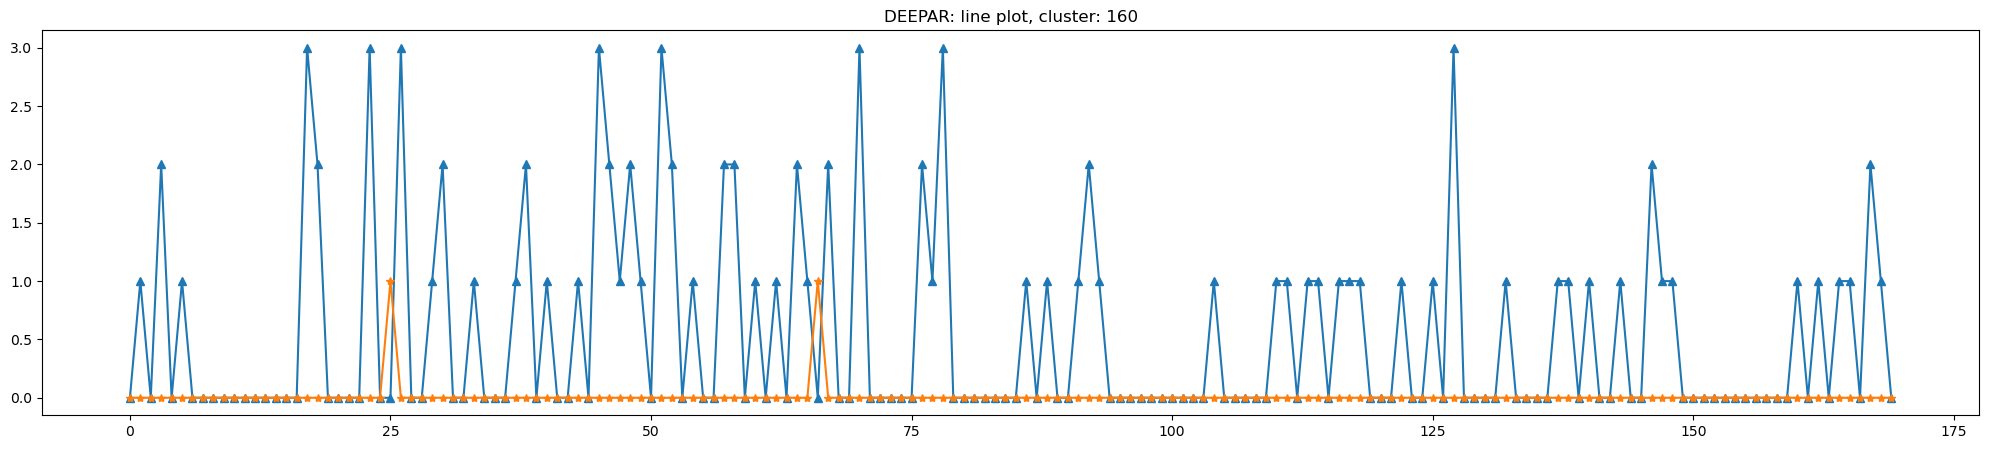

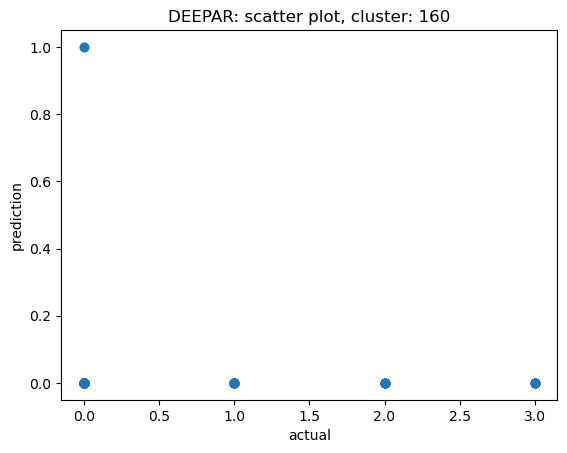

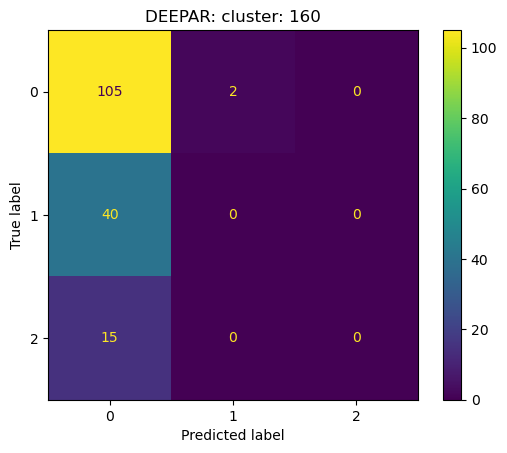

DEEPAR: RMSE from cluster: 160 = 1.0116963041173501

DEEPAR: PRECISION, RECALL & F1 scores for cluster: 160 =               precision    recall  f1-score   support

           0       0.62      0.98      0.76       107
           1       0.00      0.00      0.00        40
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00         8

    accuracy                           0.62       170
   macro avg       0.16      0.25      0.19       170
weighted avg       0.39      0.62      0.48       170




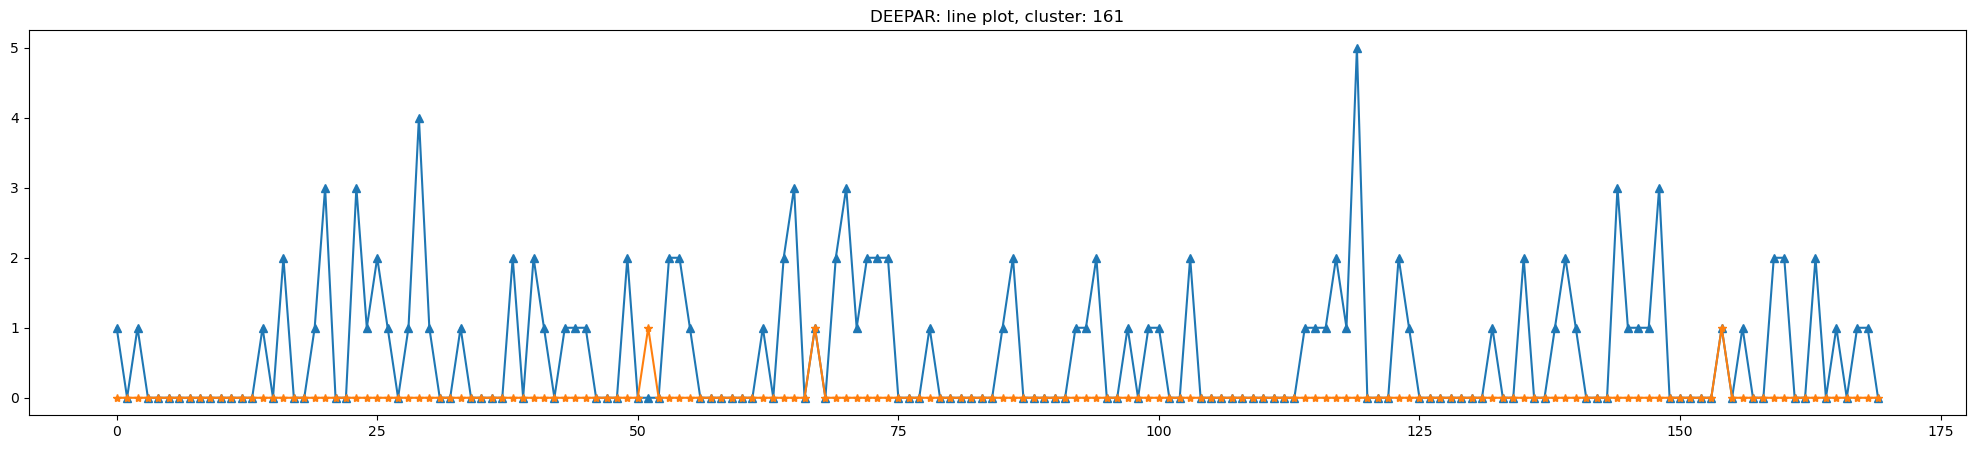

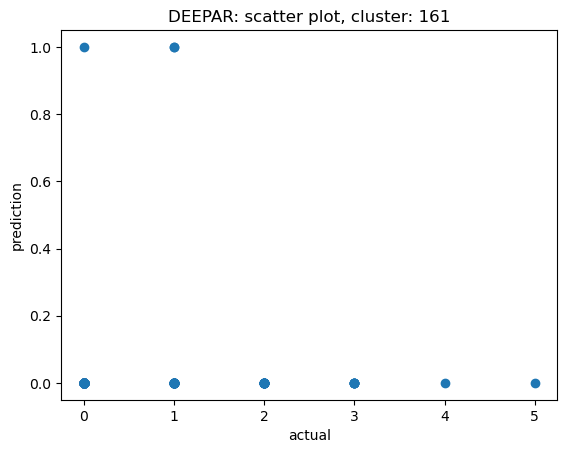

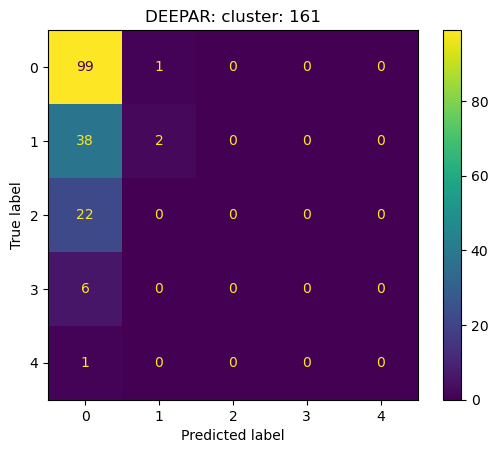

DEEPAR: RMSE from cluster: 161 = 1.1427520960125939

DEEPAR: PRECISION, RECALL & F1 scores for cluster: 161 =               precision    recall  f1-score   support

           0       0.59      0.99      0.74       100
           1       0.67      0.05      0.09        40
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.59       170
   macro avg       0.21      0.17      0.14       170
weighted avg       0.51      0.59      0.46       170




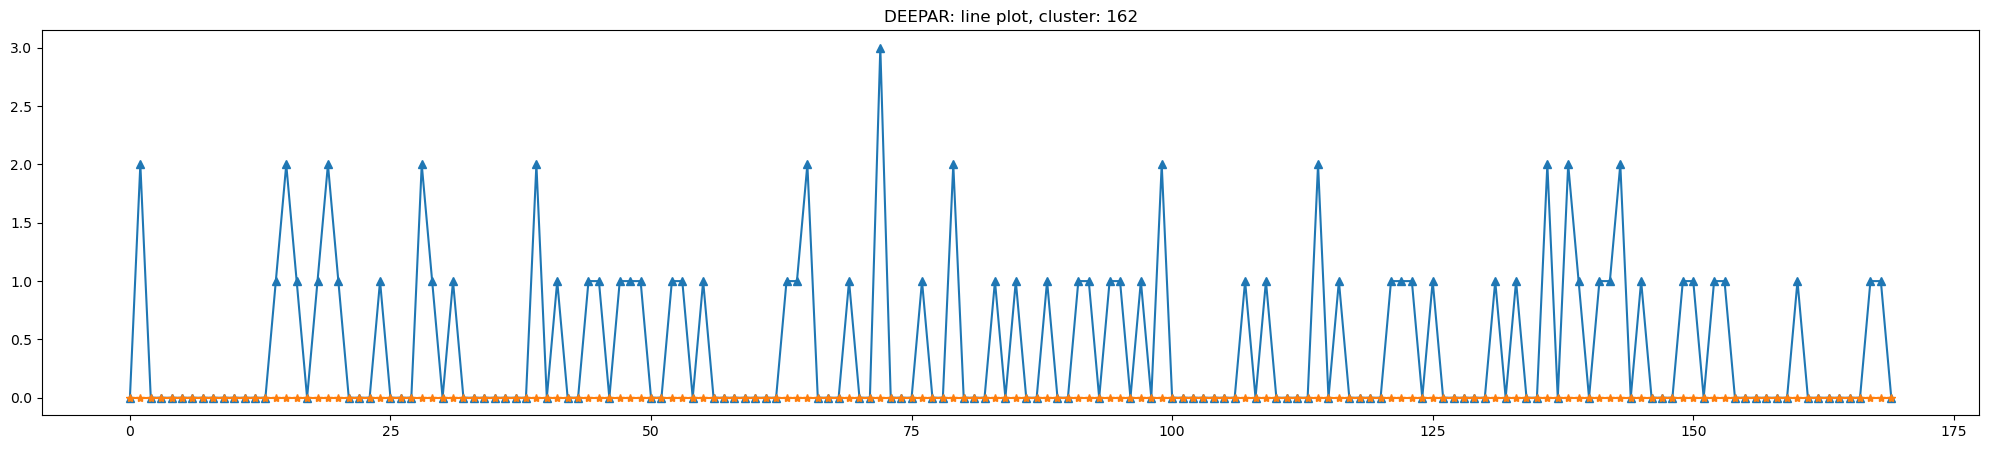

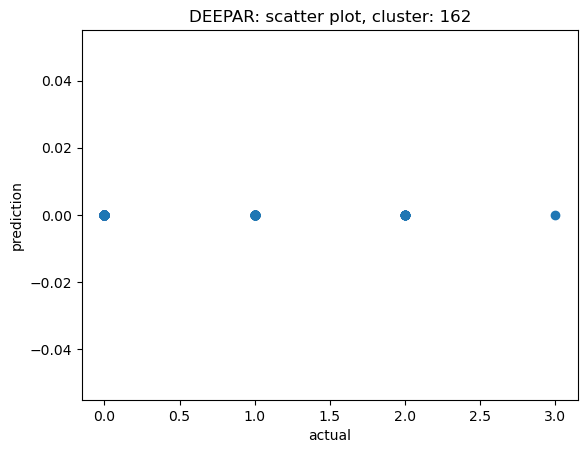

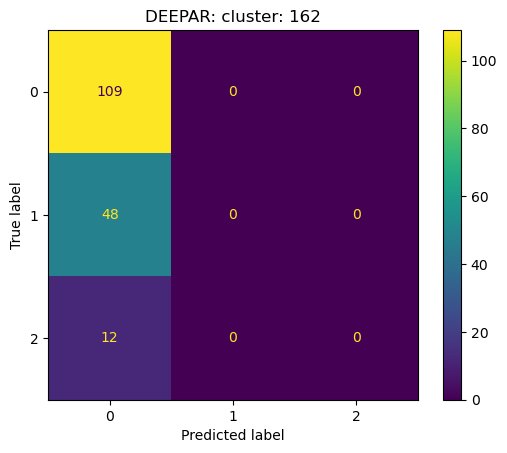

DEEPAR: RMSE from cluster: 162 = 0.7859052479933758

DEEPAR: PRECISION, RECALL & F1 scores for cluster: 162 =               precision    recall  f1-score   support

           0       0.64      1.00      0.78       109
           1       0.00      0.00      0.00        48
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         1

    accuracy                           0.64       170
   macro avg       0.16      0.25      0.20       170
weighted avg       0.41      0.64      0.50       170




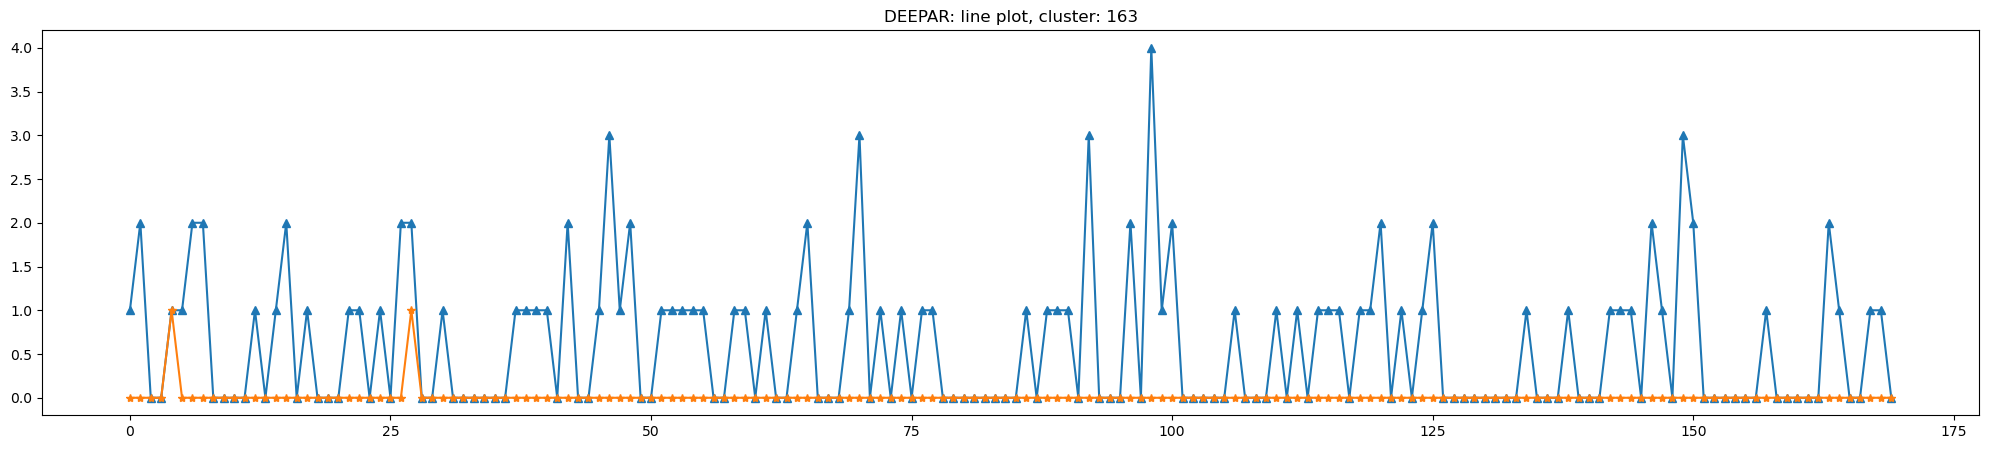

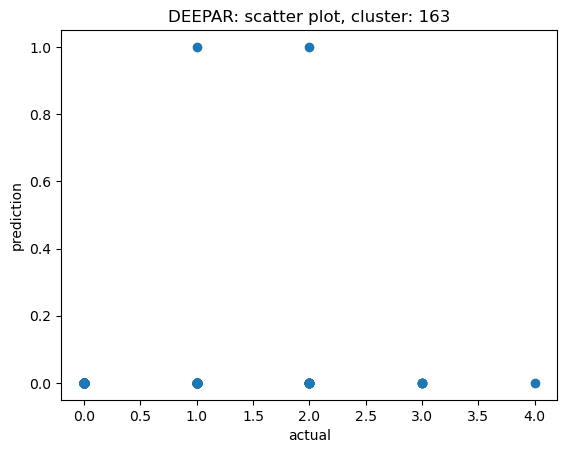

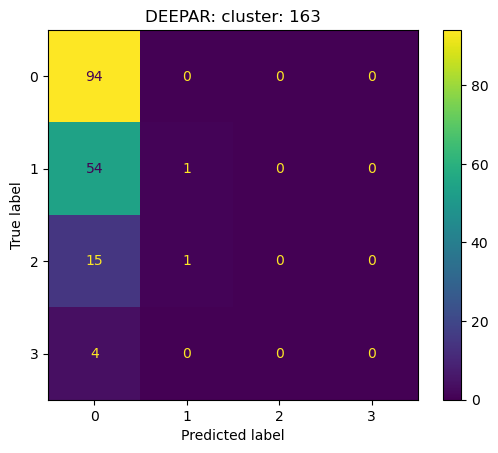

DEEPAR: RMSE from cluster: 163 = 0.9911371959403352

DEEPAR: PRECISION, RECALL & F1 scores for cluster: 163 =               precision    recall  f1-score   support

           0       0.56      1.00      0.72        94
           1       0.50      0.02      0.04        55
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1

    accuracy                           0.56       170
   macro avg       0.21      0.20      0.15       170
weighted avg       0.47      0.56      0.41       170




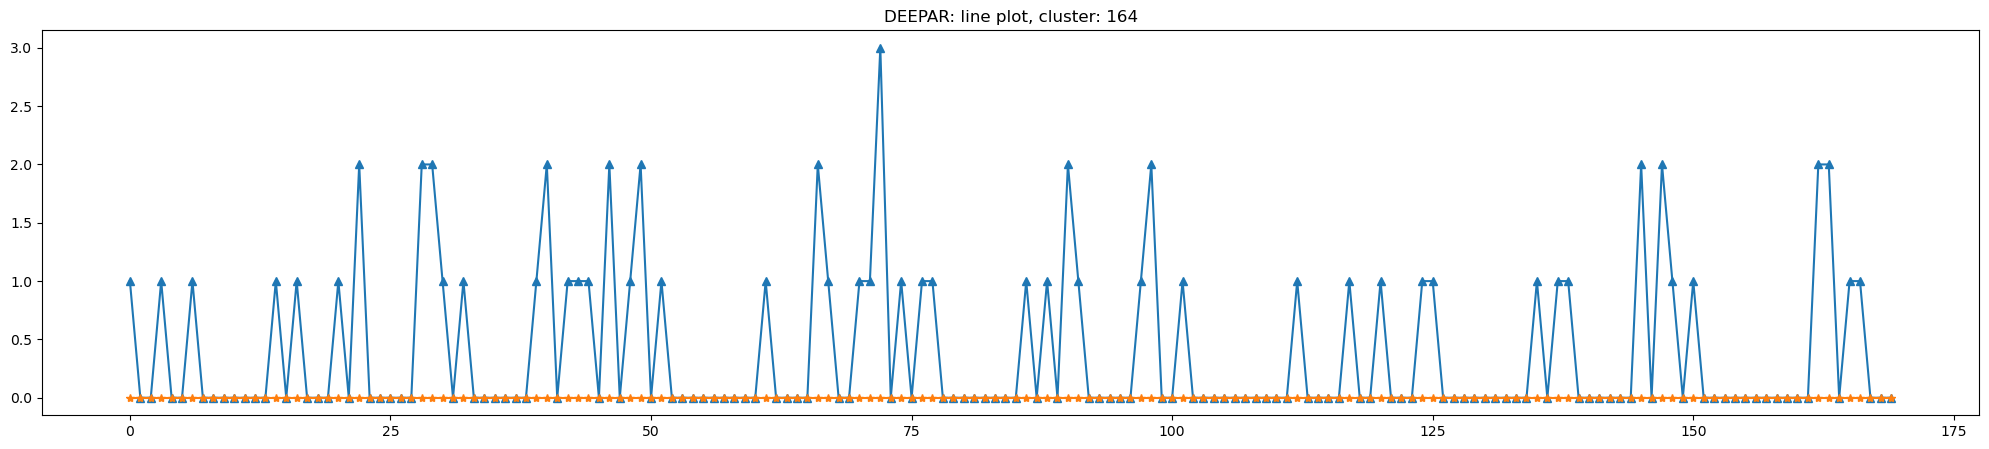

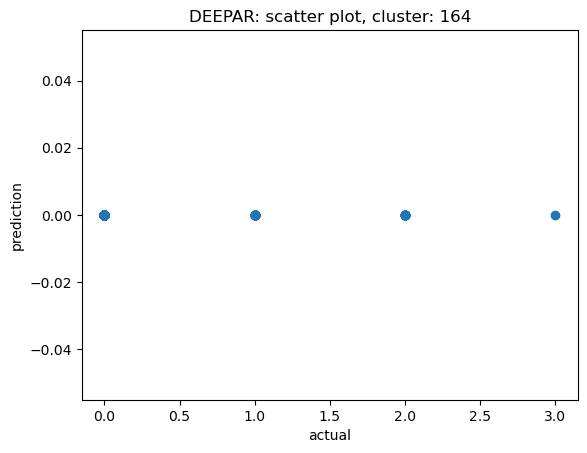

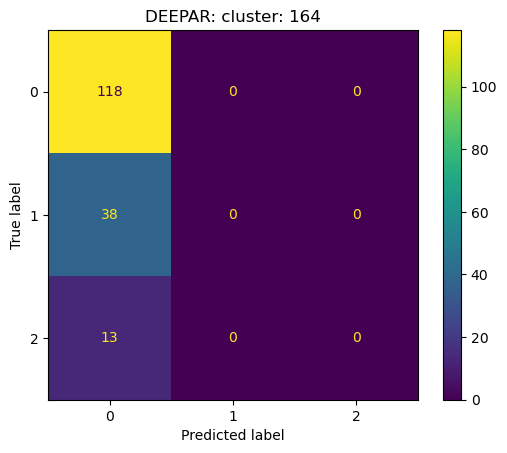

DEEPAR: RMSE from cluster: 164 = 0.7631205286037525

DEEPAR: PRECISION, RECALL & F1 scores for cluster: 164 =               precision    recall  f1-score   support

           0       0.69      1.00      0.82       118
           1       0.00      0.00      0.00        38
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         1

    accuracy                           0.69       170
   macro avg       0.17      0.25      0.20       170
weighted avg       0.48      0.69      0.57       170




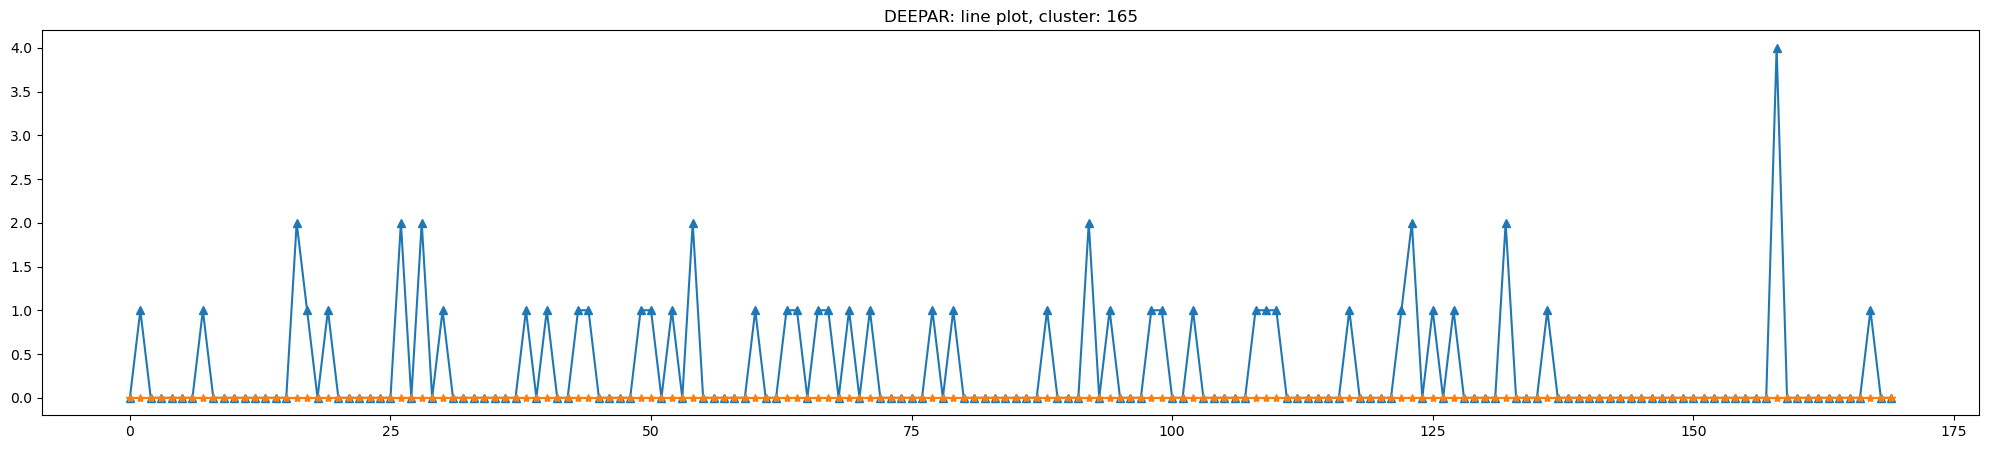

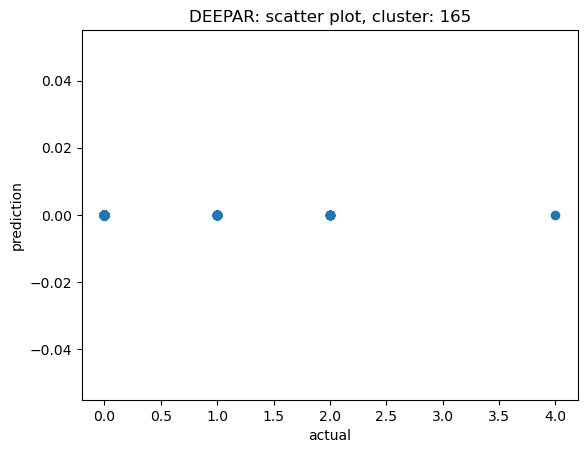

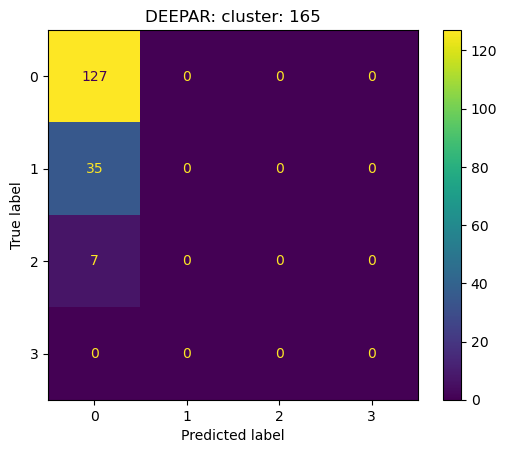

DEEPAR: RMSE from cluster: 165 = 0.6816933932149711

DEEPAR: PRECISION, RECALL & F1 scores for cluster: 165 =               precision    recall  f1-score   support

           0       0.75      1.00      0.86       127
           1       0.00      0.00      0.00        35
           2       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

    accuracy                           0.75       170
   macro avg       0.19      0.25      0.21       170
weighted avg       0.56      0.75      0.64       170




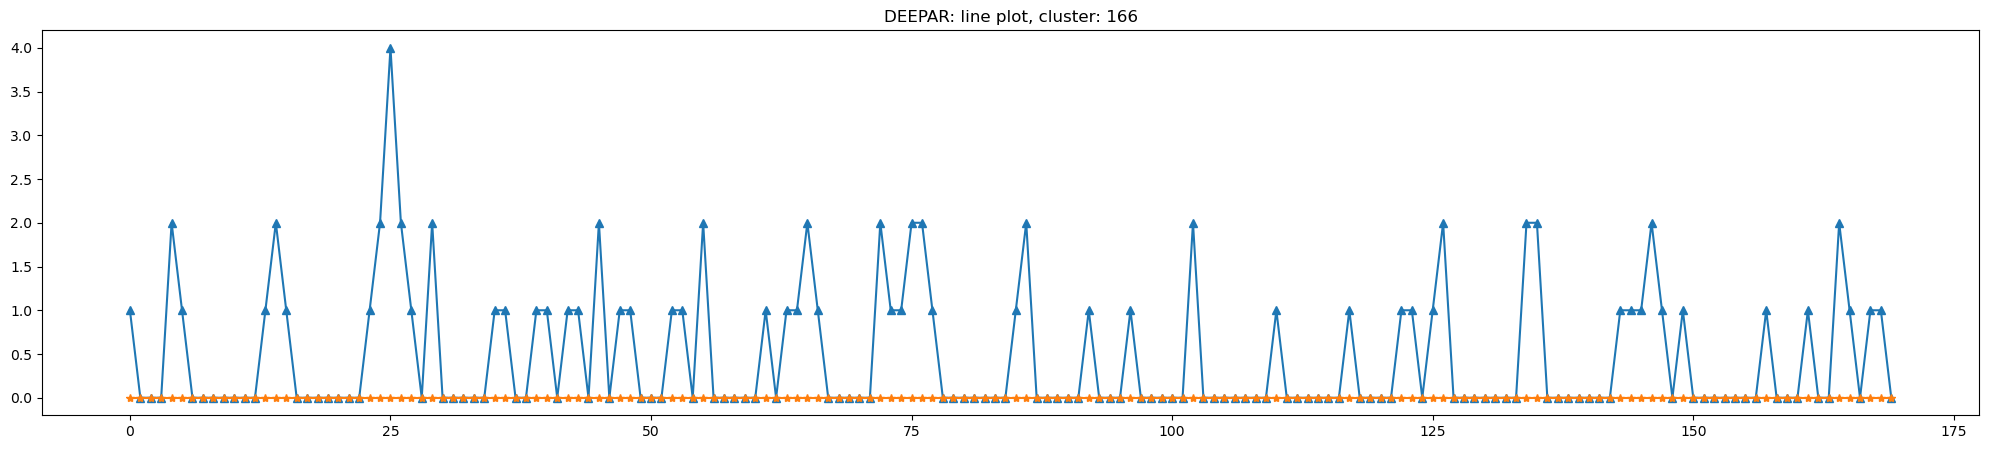

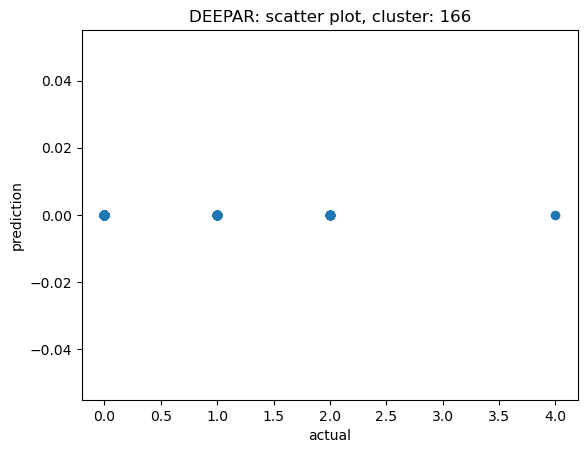

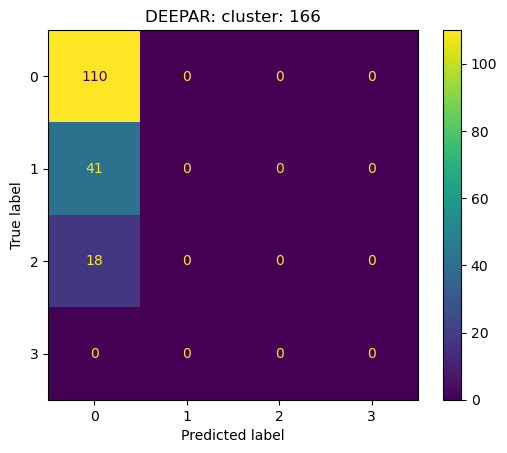

DEEPAR: RMSE from cluster: 166 = 0.8711047752203891

DEEPAR: PRECISION, RECALL & F1 scores for cluster: 166 =               precision    recall  f1-score   support

           0       0.65      1.00      0.79       110
           1       0.00      0.00      0.00        41
           2       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         1

    accuracy                           0.65       170
   macro avg       0.16      0.25      0.20       170
weighted avg       0.42      0.65      0.51       170




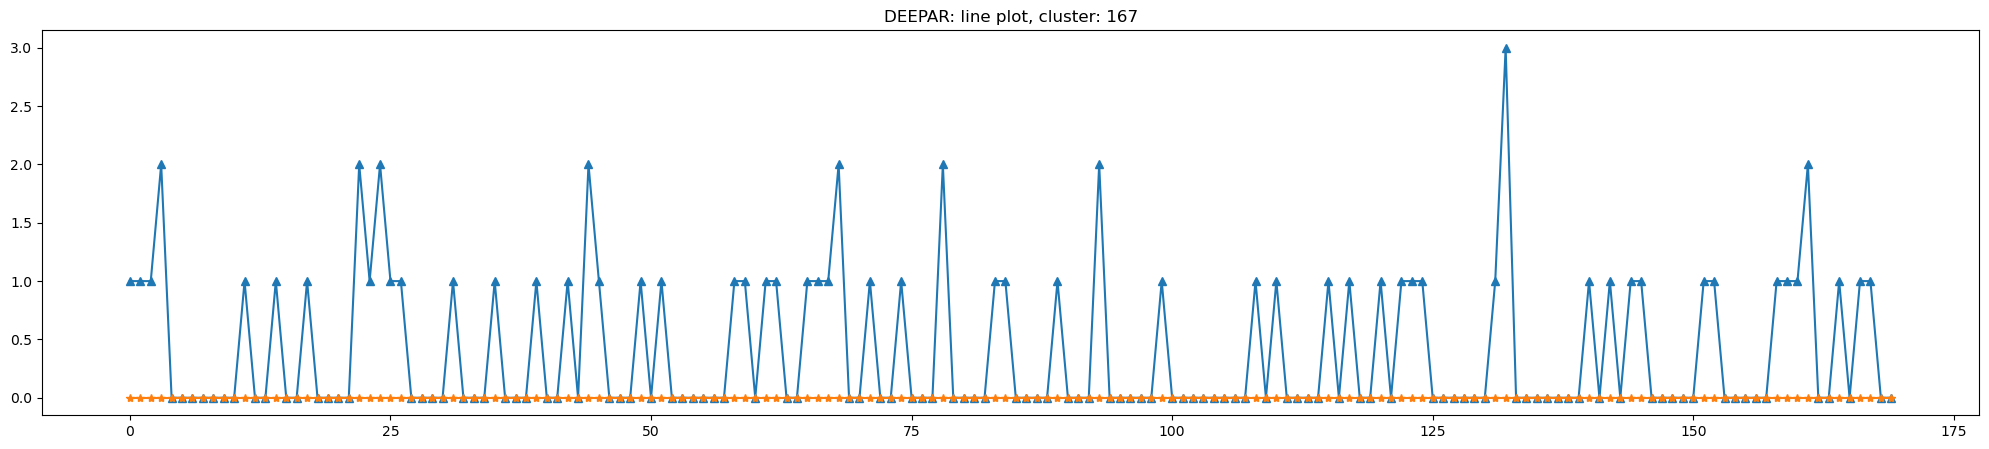

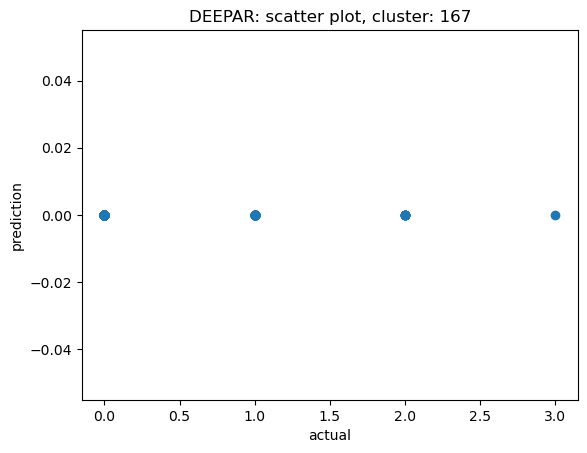

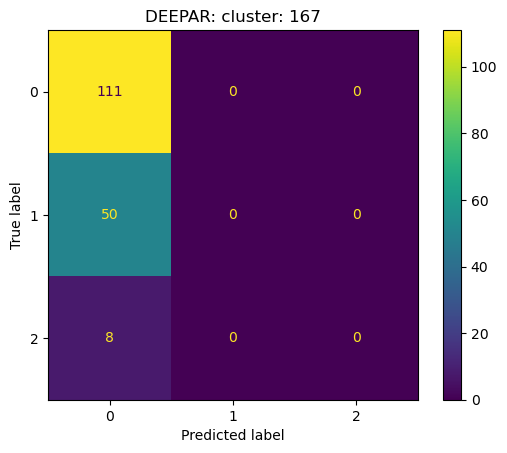

DEEPAR: RMSE from cluster: 167 = 0.7316379689758171

DEEPAR: PRECISION, RECALL & F1 scores for cluster: 167 =               precision    recall  f1-score   support

           0       0.65      1.00      0.79       111
           1       0.00      0.00      0.00        50
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1

    accuracy                           0.65       170
   macro avg       0.16      0.25      0.20       170
weighted avg       0.43      0.65      0.52       170




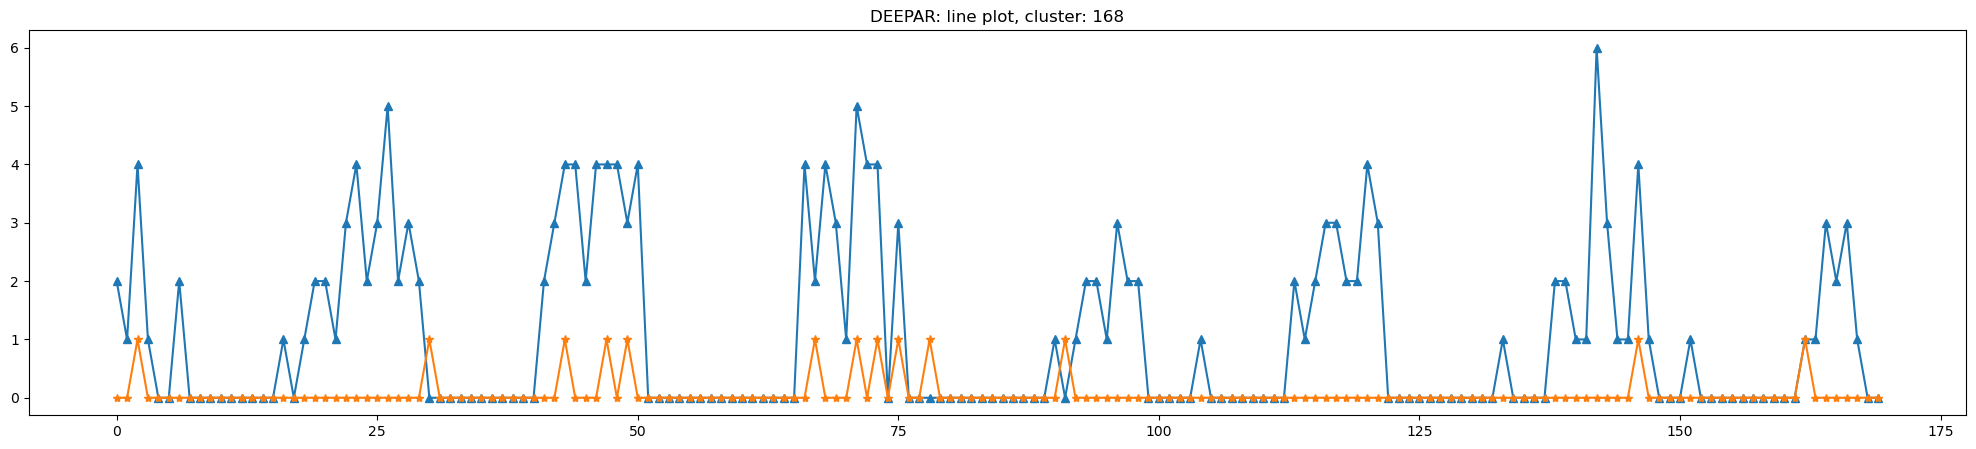

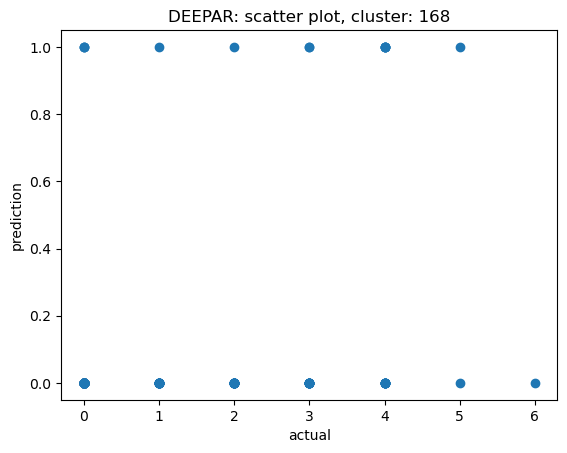

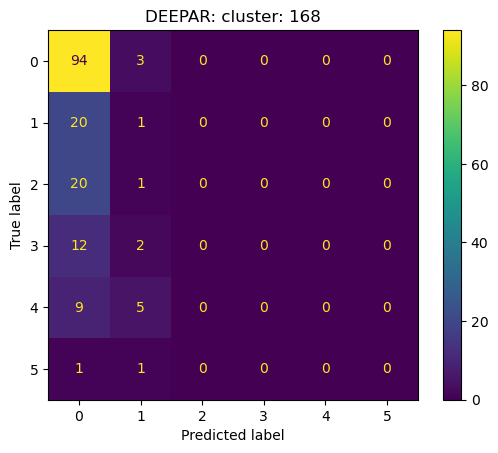

DEEPAR: RMSE from cluster: 168 = 1.6908055859299036

DEEPAR: PRECISION, RECALL & F1 scores for cluster: 168 =               precision    recall  f1-score   support

           0       0.60      0.97      0.74        97
           1       0.08      0.05      0.06        21
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.56       170
   macro avg       0.10      0.15      0.11       170
weighted avg       0.35      0.56      0.43       170




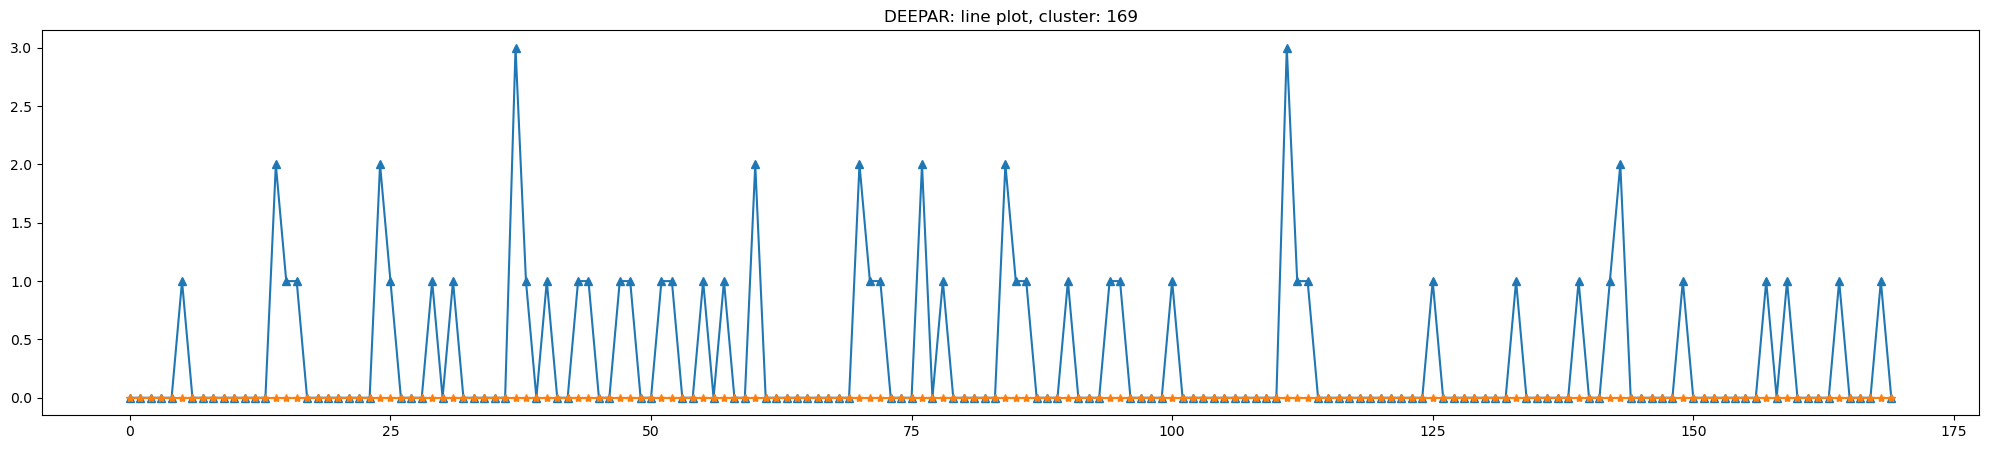

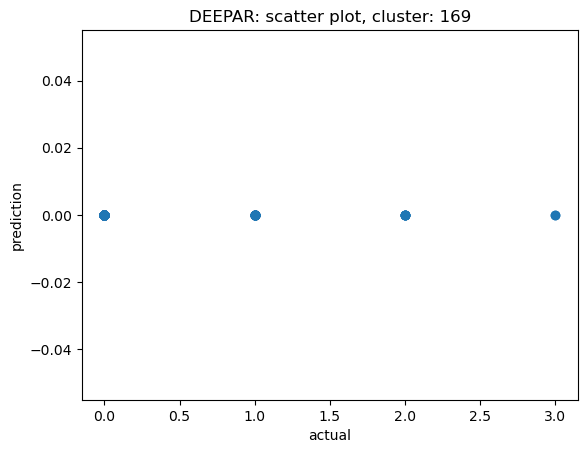

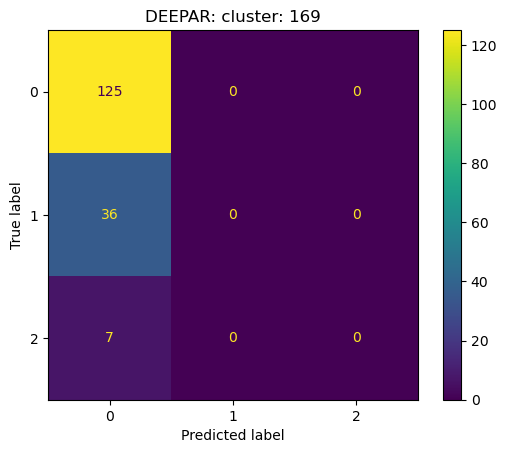

DEEPAR: RMSE from cluster: 169 = 0.6945163361480208

DEEPAR: PRECISION, RECALL & F1 scores for cluster: 169 =               precision    recall  f1-score   support

           0       0.74      1.00      0.85       125
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         2

    accuracy                           0.74       170
   macro avg       0.18      0.25      0.21       170
weighted avg       0.54      0.74      0.62       170




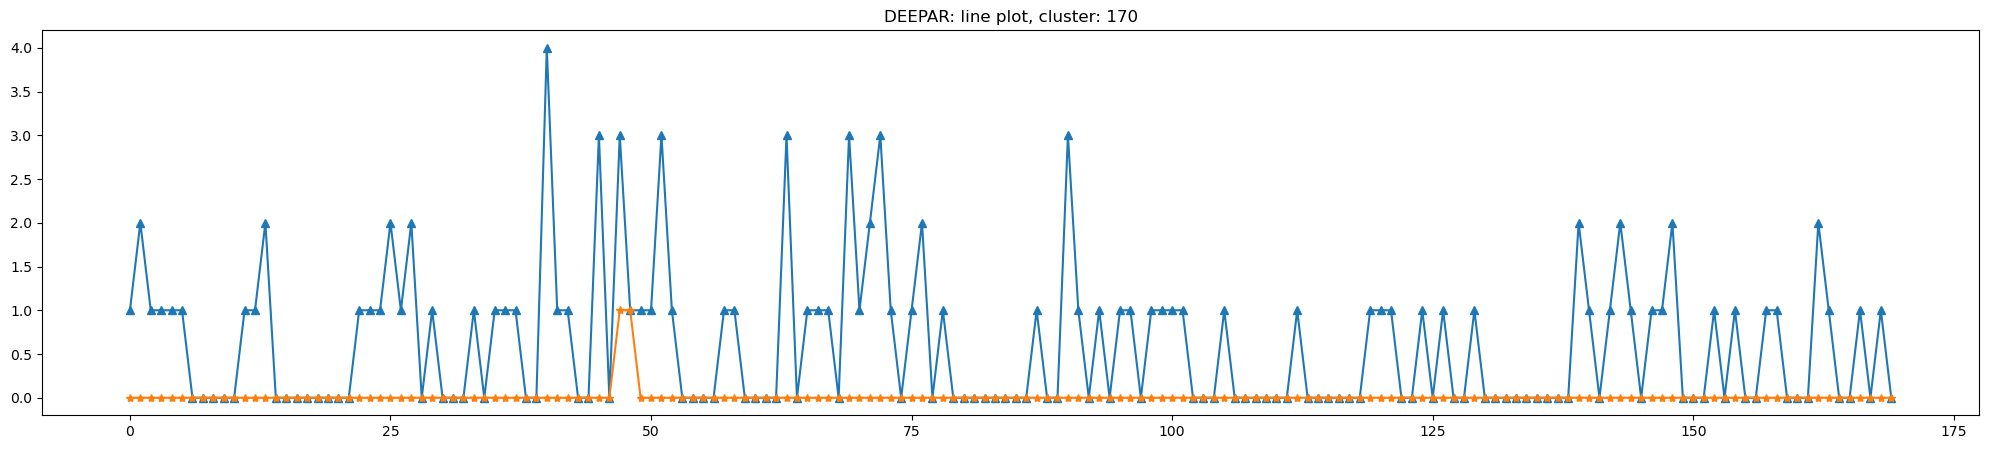

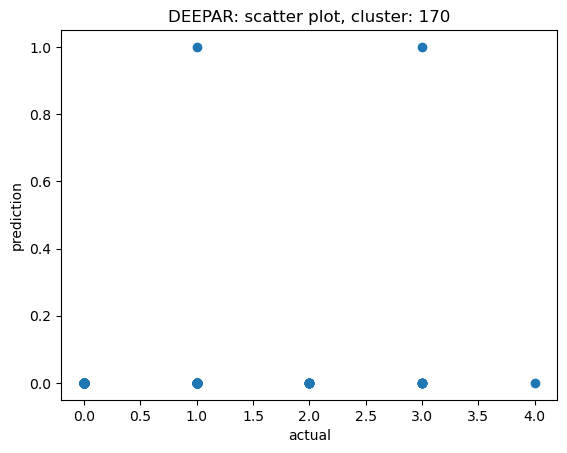

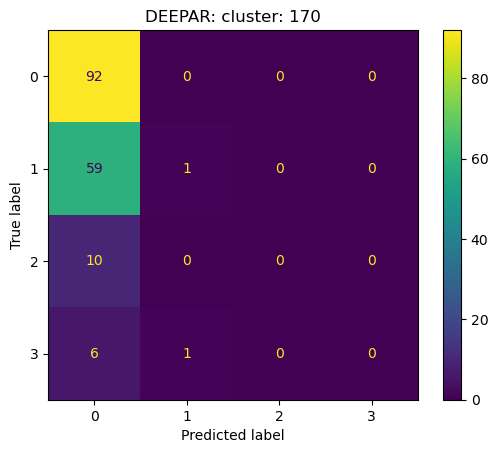

DEEPAR: RMSE from cluster: 170 = 1.0087849418104582

DEEPAR: PRECISION, RECALL & F1 scores for cluster: 170 =               precision    recall  f1-score   support

           0       0.55      1.00      0.71        92
           1       0.50      0.02      0.03        60
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

    accuracy                           0.55       170
   macro avg       0.21      0.20      0.15       170
weighted avg       0.47      0.55      0.39       170




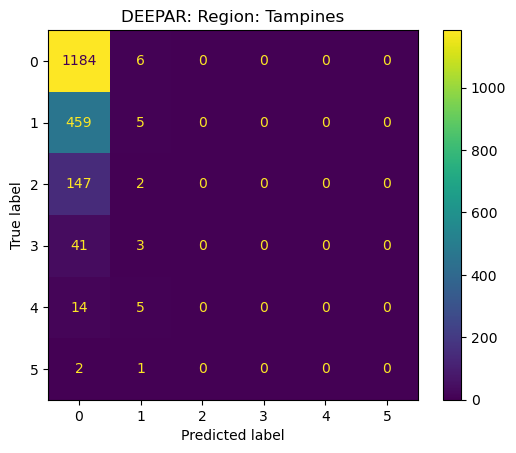

DEEPAR: Total RMSE from all clusters:  0.9830107631291772

DEEPAR: PRECISION, RECALL & F1 scores for Region: Tampines =               precision    recall  f1-score   support

           0       0.64      0.99      0.78      1190
           1       0.23      0.01      0.02       464
           2       0.00      0.00      0.00       149
           3       0.00      0.00      0.00        44
           4       0.00      0.00      0.00        19
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1

    accuracy                           0.64      1870
   macro avg       0.12      0.14      0.11      1870
weighted avg       0.46      0.64      0.50      1870



 Hyperparameters: neu,lay,bat,lr,enc_len,pred_len,drop,

725 2 4 2.924116486316496e-05 18 1 0.0  



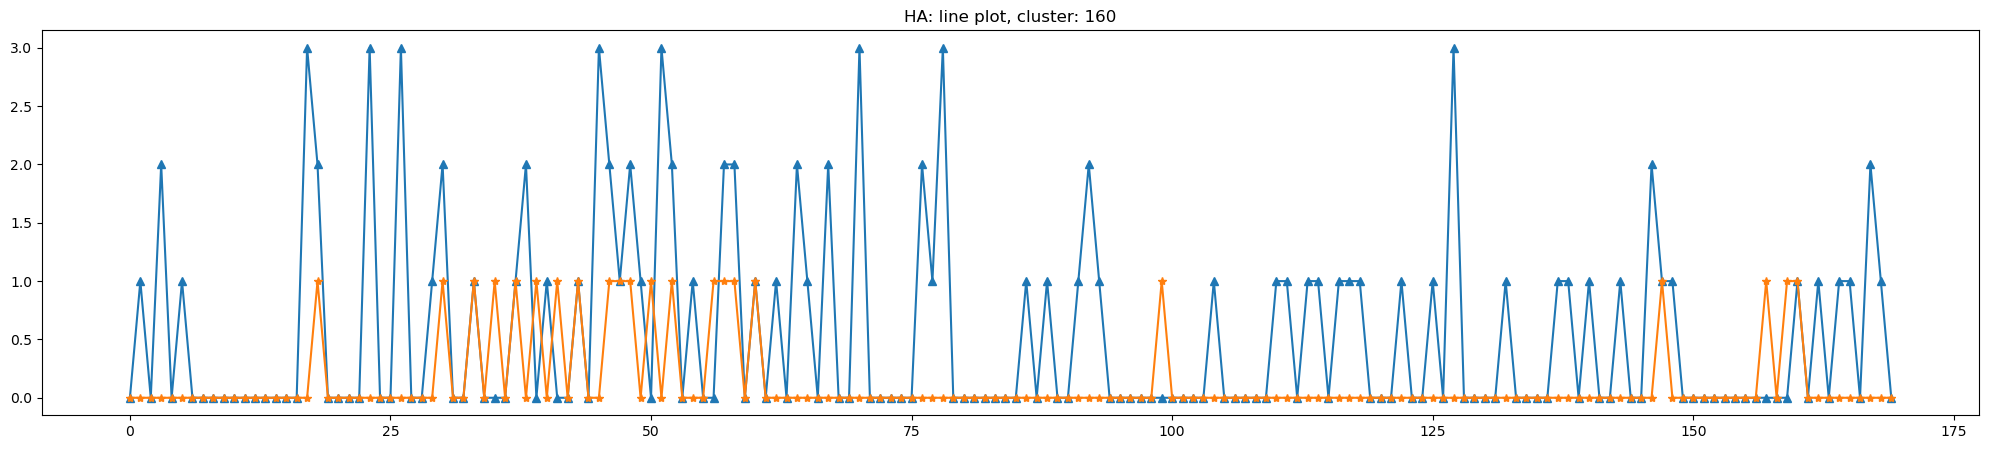

HA: RMSE from cluster: 160 = 0.9455779434075351

HA: PRECISION, RECALL & F1 scores for cluster: 160 =               precision    recall  f1-score   support

           0       0.67      0.93      0.78       107
           1       0.32      0.17      0.23        40
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00         8

    accuracy                           0.62       170
   macro avg       0.25      0.28      0.25       170
weighted avg       0.50      0.62      0.54       170




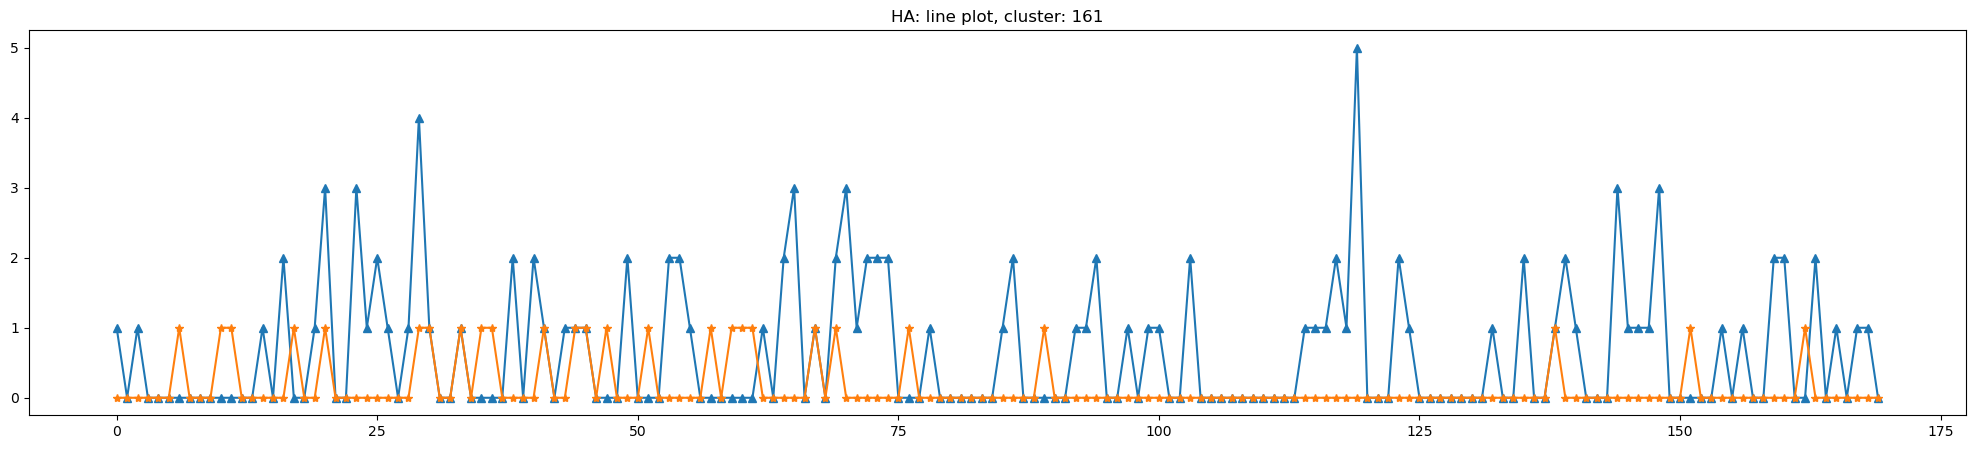

HA: RMSE from cluster: 161 = 1.1298099788173648

HA: PRECISION, RECALL & F1 scores for cluster: 161 =               precision    recall  f1-score   support

           0       0.58      0.84      0.69       100
           1       0.27      0.17      0.21        40
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1

    accuracy                           0.54       170
   macro avg       0.14      0.17      0.15       170
weighted avg       0.41      0.54      0.45       170




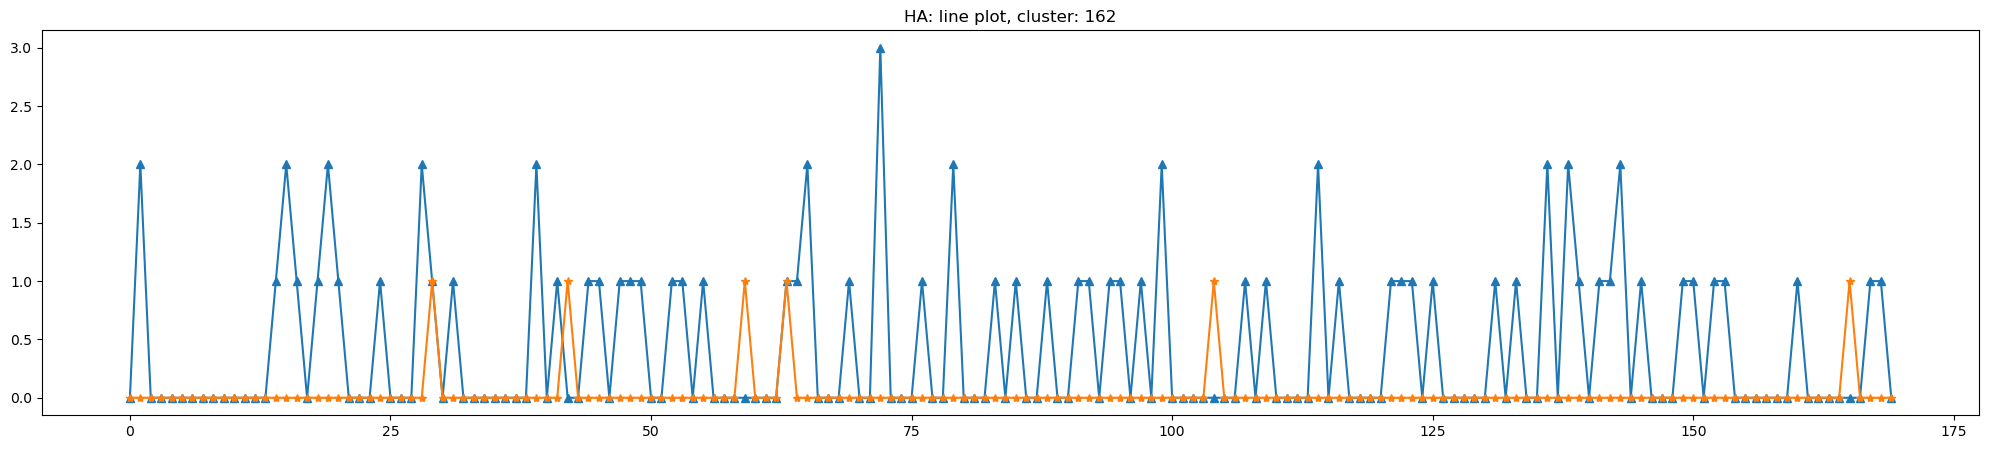

HA: RMSE from cluster: 162 = 0.7933547533770011

HA: PRECISION, RECALL & F1 scores for cluster: 162 =               precision    recall  f1-score   support

           0       0.64      0.96      0.77       109
           1       0.33      0.04      0.07        48
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00         1

    accuracy                           0.63       170
   macro avg       0.24      0.25      0.21       170
weighted avg       0.50      0.63      0.51       170




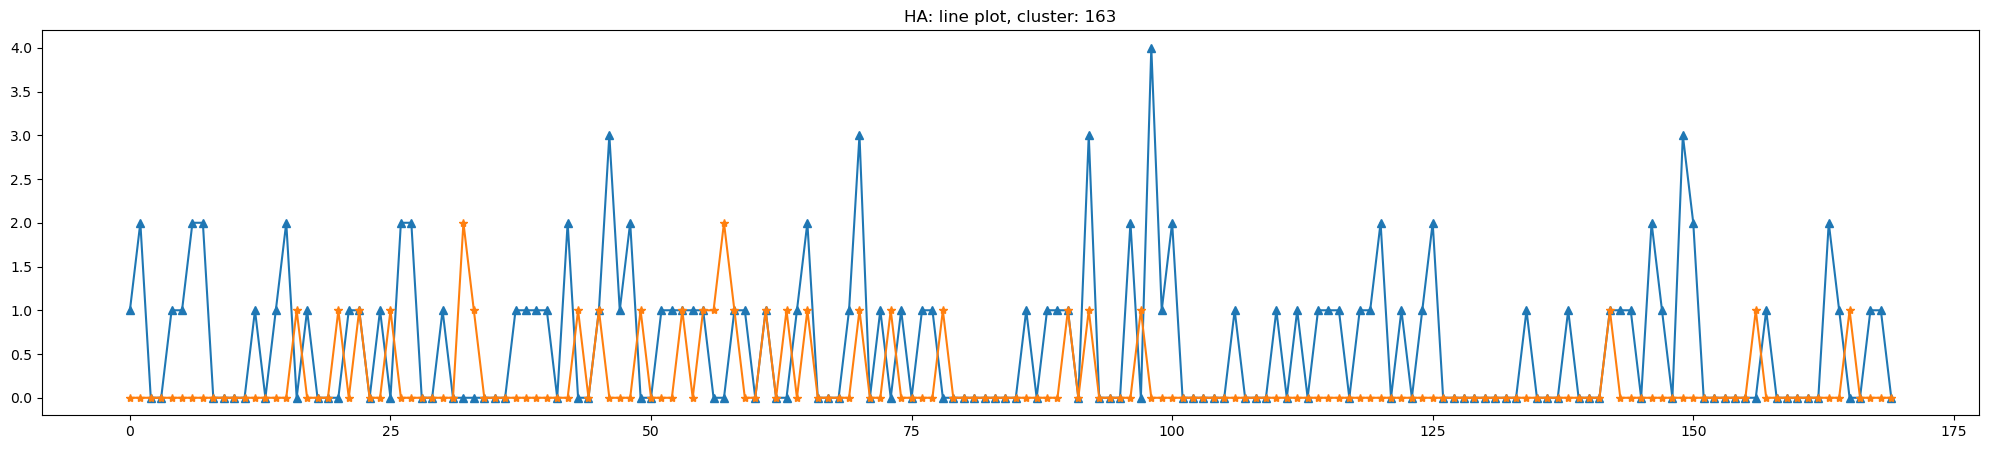

HA: RMSE from cluster: 163 = 1.0029368638858462

HA: PRECISION, RECALL & F1 scores for cluster: 163 =               precision    recall  f1-score   support

           0       0.55      0.84      0.66        94
           1       0.33      0.15      0.20        55
           2       0.00      0.00      0.00        16
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00         1

    accuracy                           0.51       170
   macro avg       0.18      0.20      0.17       170
weighted avg       0.41      0.51      0.43       170




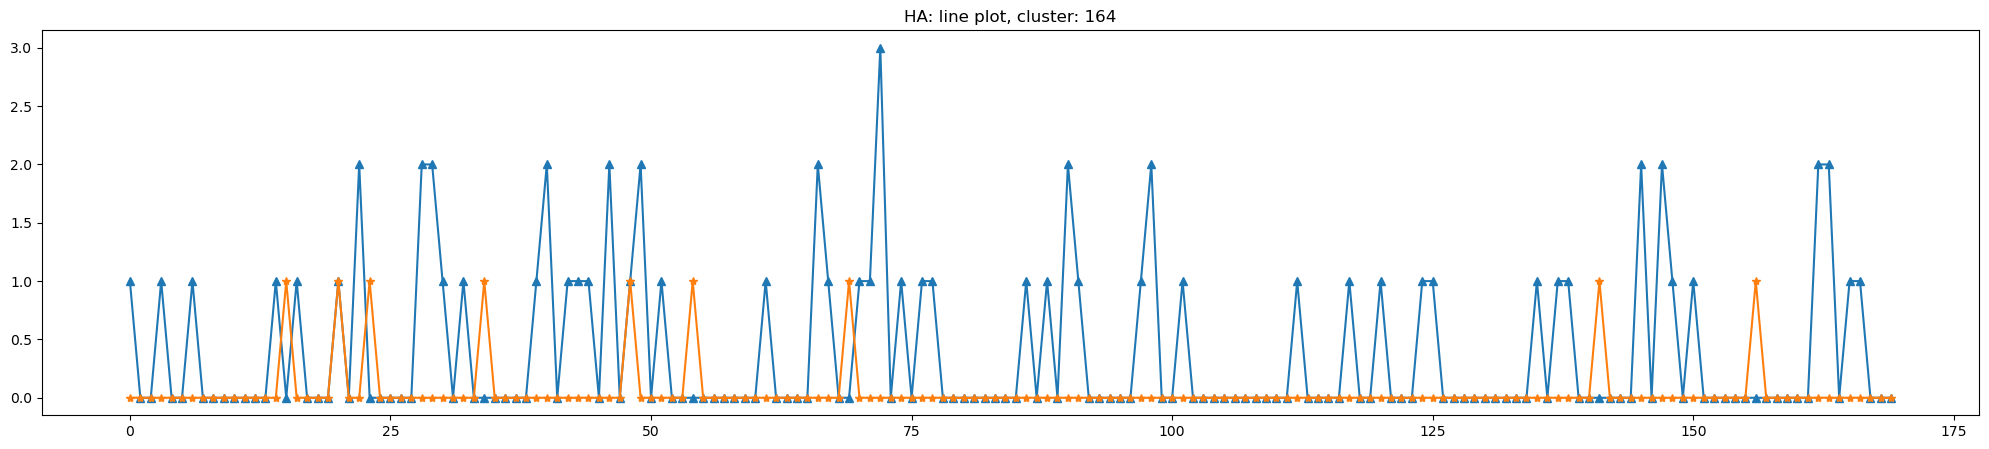

HA: RMSE from cluster: 164 = 0.7821538888750429

HA: PRECISION, RECALL & F1 scores for cluster: 164 =               precision    recall  f1-score   support

           0       0.69      0.94      0.80       118
           1       0.22      0.05      0.09        38
           2       0.00      0.00      0.00        13
           3       0.00      0.00      0.00         1

    accuracy                           0.66       170
   macro avg       0.23      0.25      0.22       170
weighted avg       0.53      0.66      0.57       170




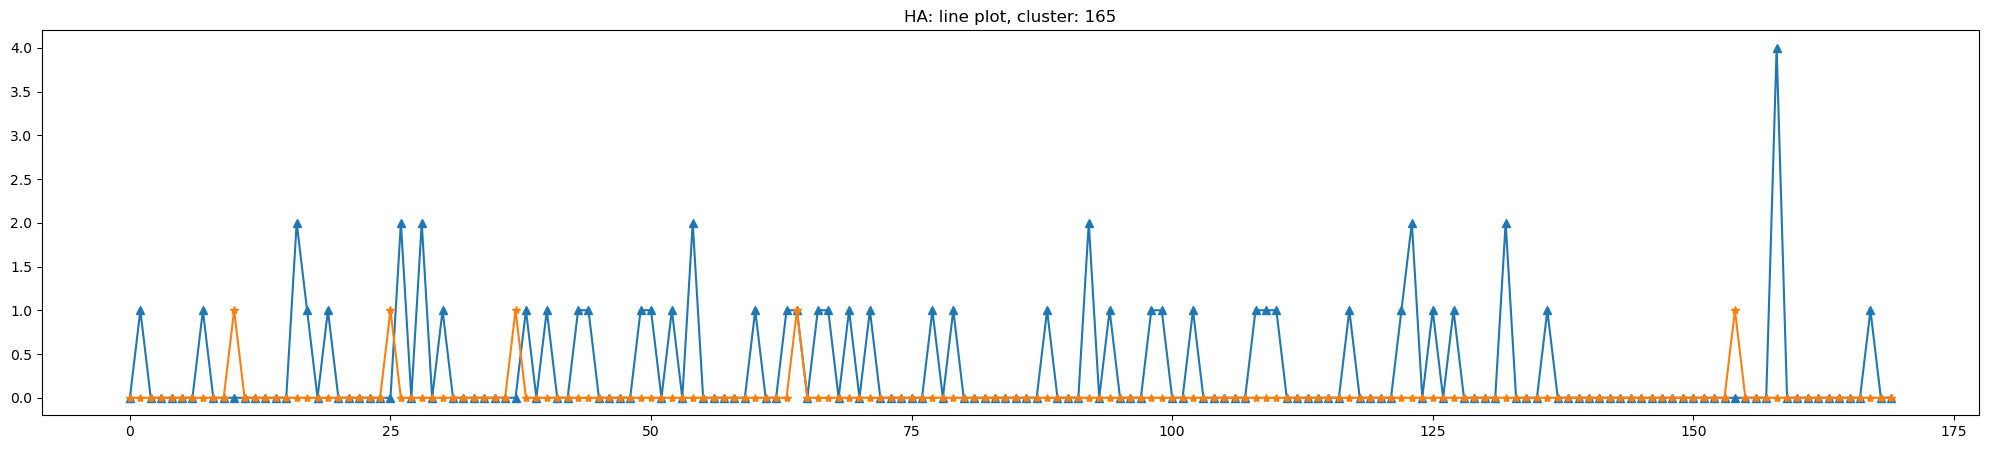

HA: RMSE from cluster: 165 = 0.6945163361480208

HA: PRECISION, RECALL & F1 scores for cluster: 165 =               precision    recall  f1-score   support

           0       0.75      0.97      0.84       127
           1       0.20      0.03      0.05        35
           2       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

    accuracy                           0.73       170
   macro avg       0.24      0.25      0.22       170
weighted avg       0.60      0.73      0.64       170




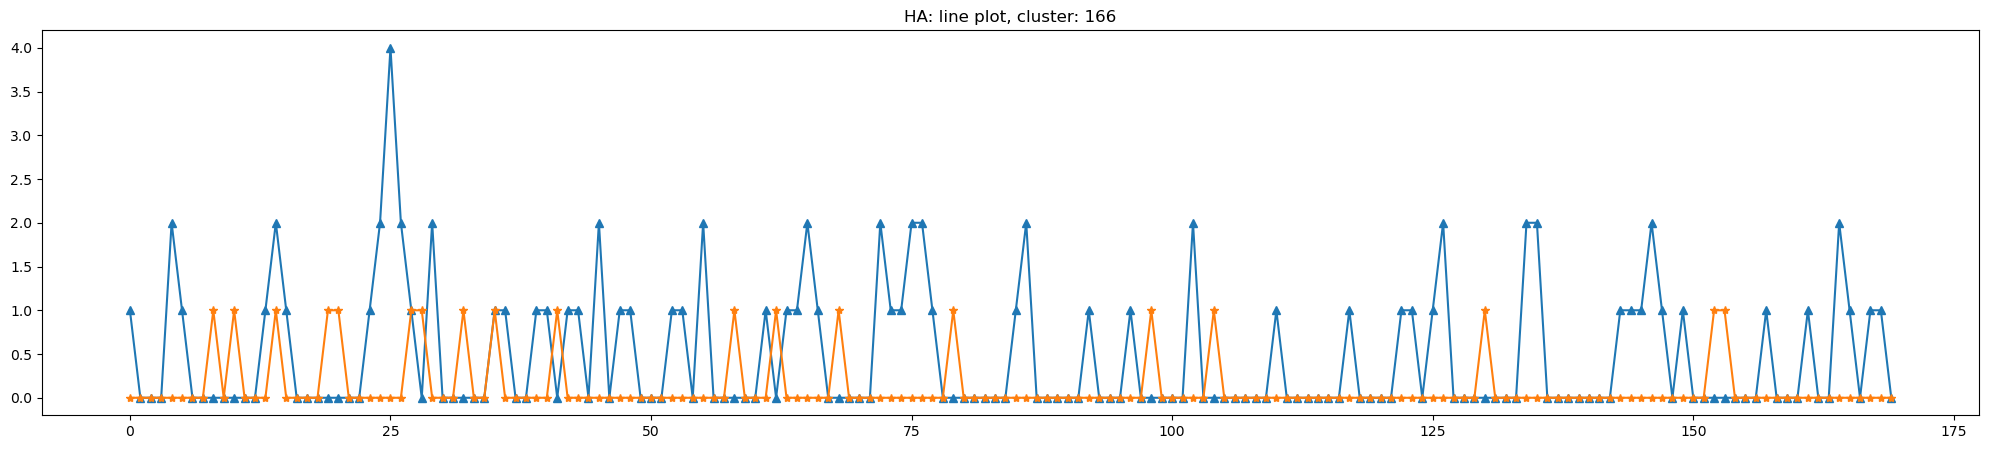

HA: RMSE from cluster: 166 = 0.9074852129730301

HA: PRECISION, RECALL & F1 scores for cluster: 166 =               precision    recall  f1-score   support

           0       0.62      0.85      0.72       110
           1       0.11      0.05      0.07        41
           2       0.00      0.00      0.00        18
           4       0.00      0.00      0.00         1

    accuracy                           0.56       170
   macro avg       0.18      0.23      0.20       170
weighted avg       0.43      0.56      0.48       170




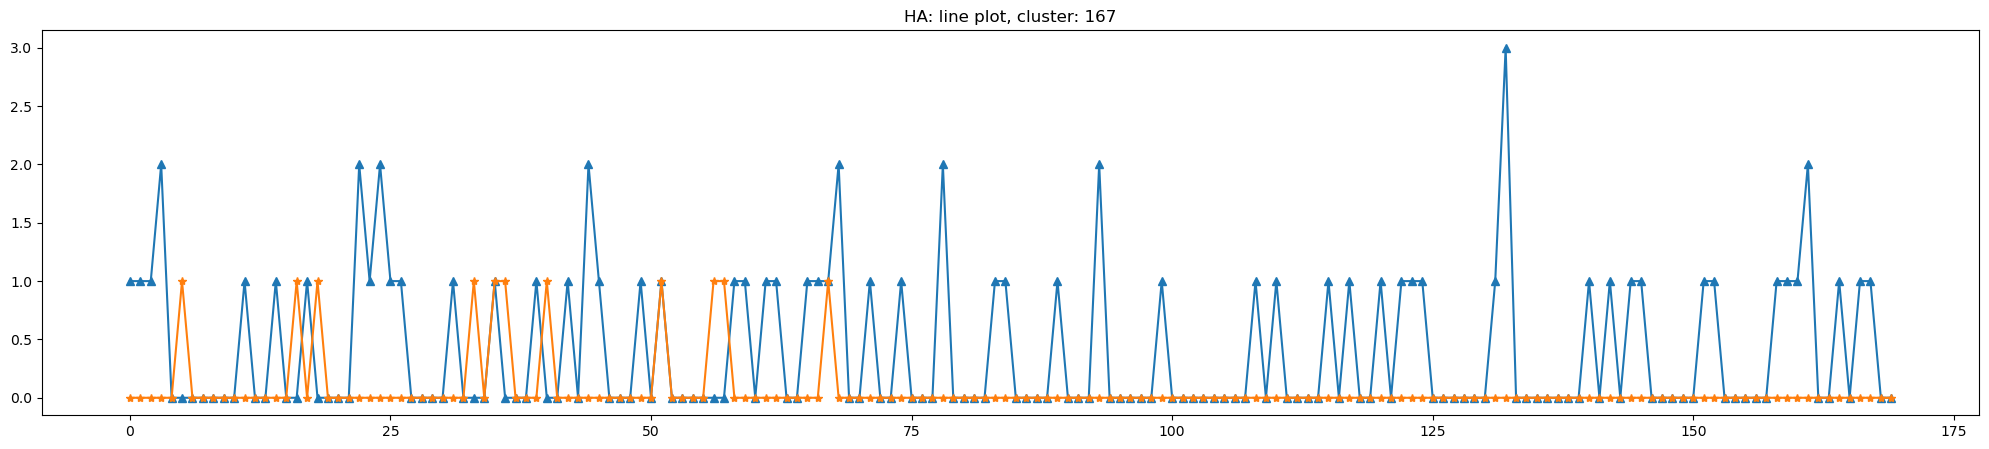

HA: RMSE from cluster: 167 = 0.7514691493021793

HA: PRECISION, RECALL & F1 scores for cluster: 167 =               precision    recall  f1-score   support

           0       0.65      0.93      0.76       111
           1       0.27      0.06      0.10        50
           2       0.00      0.00      0.00         8
           3       0.00      0.00      0.00         1

    accuracy                           0.62       170
   macro avg       0.23      0.25      0.22       170
weighted avg       0.50      0.62      0.53       170




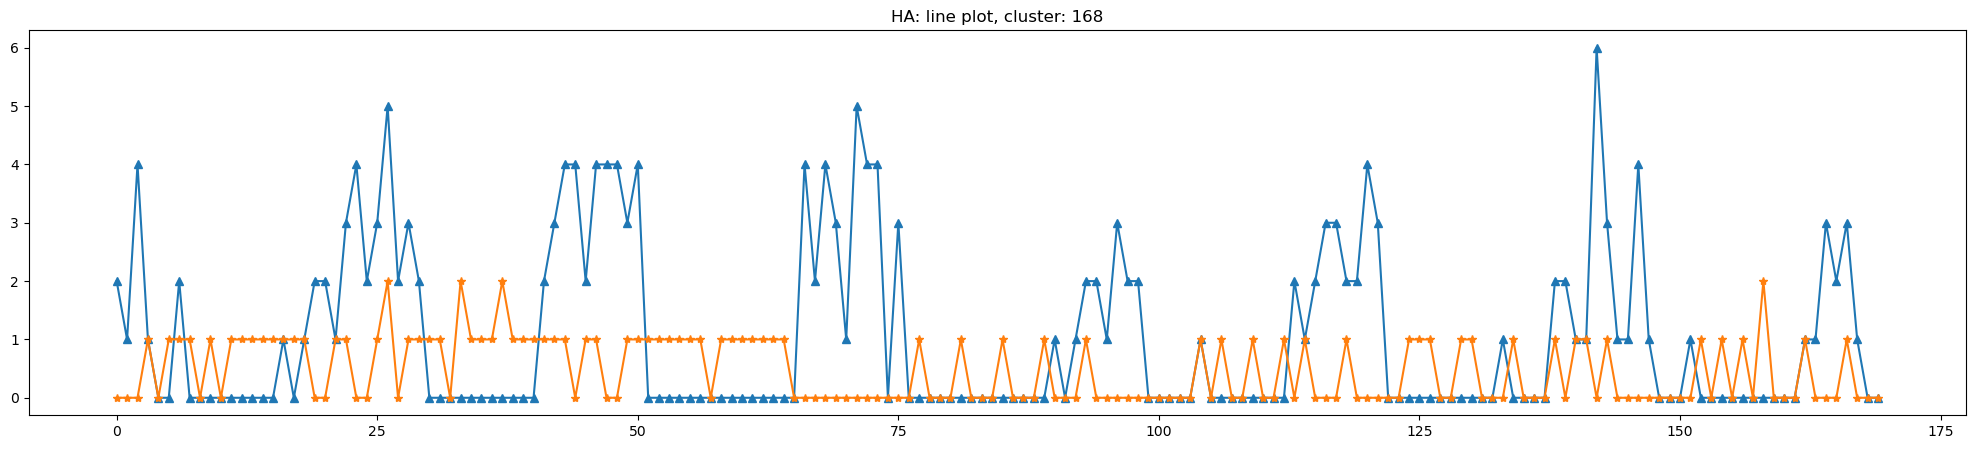

HA: RMSE from cluster: 168 = 1.7098331531949853

HA: PRECISION, RECALL & F1 scores for cluster: 168 =               precision    recall  f1-score   support

           0       0.51      0.49      0.50        97
           1       0.12      0.43      0.19        21
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        14
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.34       170
   macro avg       0.09      0.13      0.10       170
weighted avg       0.31      0.34      0.31       170




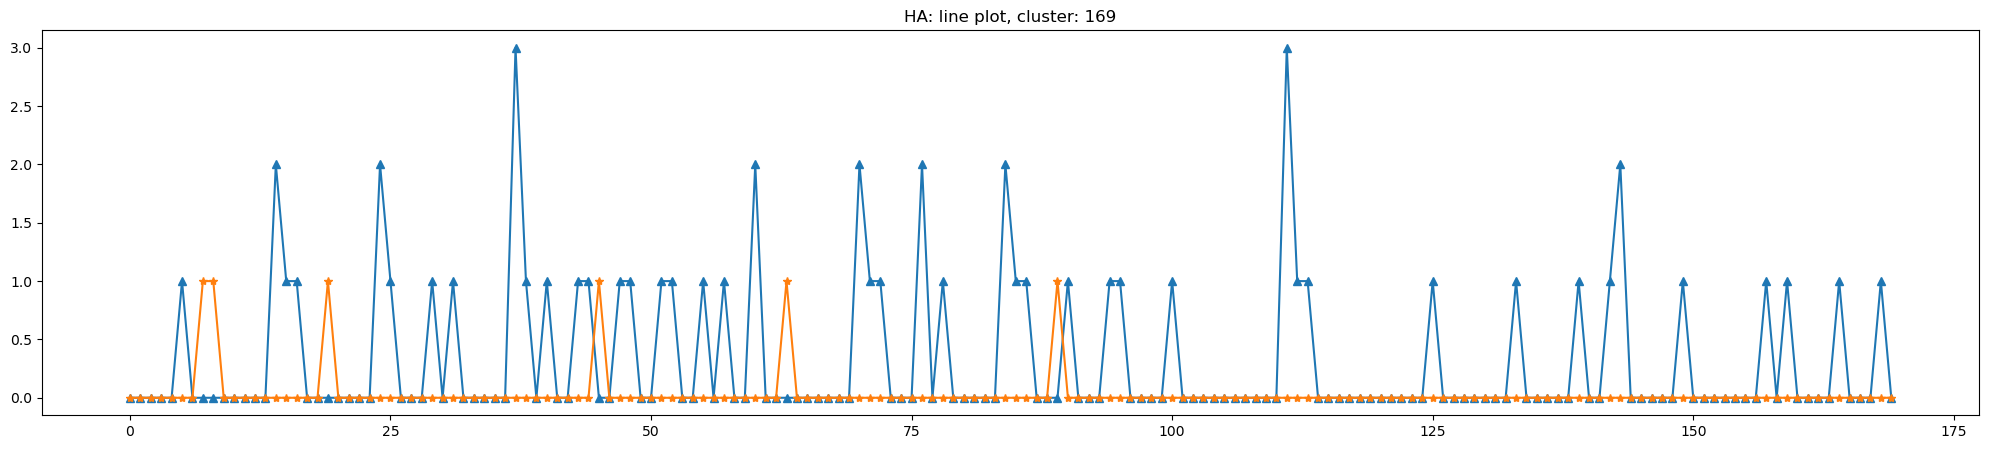

HA: RMSE from cluster: 169 = 0.7194769341845014

HA: PRECISION, RECALL & F1 scores for cluster: 169 =               precision    recall  f1-score   support

           0       0.73      0.95      0.82       125
           1       0.00      0.00      0.00        36
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         2

    accuracy                           0.70       170
   macro avg       0.18      0.24      0.21       170
weighted avg       0.53      0.70      0.61       170




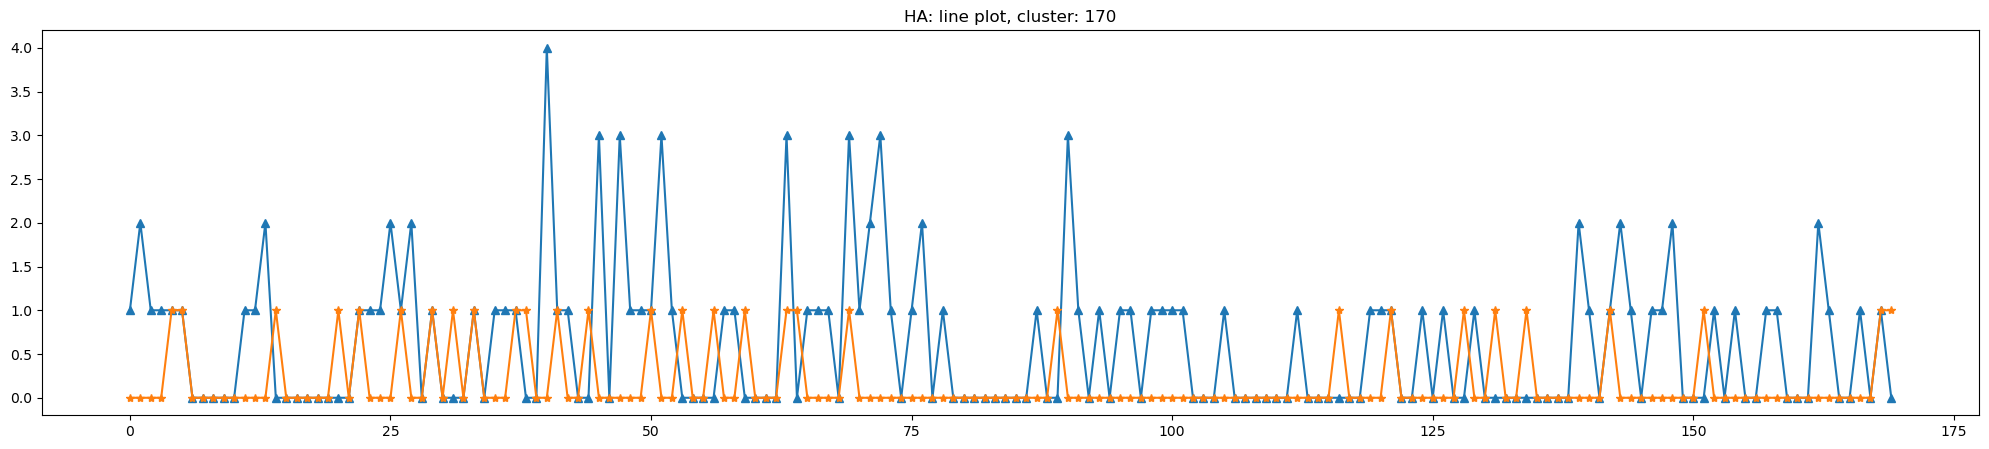

HA: RMSE from cluster: 170 = 1.0087849418104582

HA: PRECISION, RECALL & F1 scores for cluster: 170 =               precision    recall  f1-score   support

           0       0.54      0.83      0.66        92
           1       0.40      0.20      0.27        60
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         1

    accuracy                           0.52       170
   macro avg       0.19      0.21      0.18       170
weighted avg       0.43      0.52      0.45       170


HA: Total RMSE from all clusters:  0.9884358085346681
\HA: PRECISION, RECALL & F1 scores for Region: Tampines =               precision    recall  f1-score   support

           0       0.64      0.87      0.74      1190
           1       0.23      0.11      0.15       464
           2       0.00      0.00      0.00       149
           3       0.00      0.00      0.00        44
           4       0.00  

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/DeepAR_demand_prediction-linux-gpu/2_freq_nbinom_LSTM/1_cluster_demand_prediction/data/results_data'

In [9]:
######### optuna results #####################
# if __name__ == '__main__':
study = optuna.create_study(direction="minimize")
study.optimize(objective, timeout=72000, n_trials=2)

pruned_trials = study.get_trials(deepcopy=False, states=[TrialState.PRUNED])
complete_trials = study.get_trials(deepcopy=False, states=[TrialState.COMPLETE])

print("Study statistics: ")
print("  Number of finished trials: ", len(study.trials))
print("  Number of pruned trials: ", len(pruned_trials))
print("  Number of complete trials: ", len(complete_trials))

print("Best trial:")
trial = study.best_trial

print("  Value: ", trial.value)

print("  Params: ")
for key, value in trial.params.items(): ## this is same as study.best_params
    print("    {}: {}".format(key, value))

fig = optuna.visualization.plot_parallel_coordinate(study)
fig.show()

fig = optuna.visualization.plot_optimization_history(study)
fig.show()

fig = optuna.visualization.plot_slice(study)
fig.show()

fig = optuna.visualization.plot_param_importances(study)
fig.show()

print("Best hyperparameters:", study.best_params)

neurons = study.best_params["neu"]
layers = study.best_params["lay"]
batch_size = study.best_params["bat"]
learning_rate = study.best_params["lr"]
dropout = study.best_params["dropout"]
encoder_length = encoder_length
max_epochs = study.best_params["num_ep"]

train_and_forecast(neurons,layers,batch_size,learning_rate,dropout,encoder_length,max_epochs,region,full_train_data,val_data,test_data, full_train_datetime, test_datetime,season_len,num_past_seas)

# import os,sys
# """ Linux"""
# os.chdir("/home/optimusprime/Desktop/peeterson/github/DeepAR_demand_prediction/2_freq_nbinom_LSTM/1_cluster_demand_prediction/model/standalone")
# sys.path.append(os.path.abspath(os.path.join("/home/optimusprime/Desktop/peeterson/github/DeepAR_demand_prediction/2_freq_nbinom_LSTM/1_cluster_demand_prediction/model/standalone")))


# """ colab 
# os.chdir('/content/drive/MyDrive/DeepAR_demand_prediction-linux-gpu/2_freq_nbinom_LSTM/1_cluster_demand_prediction/model/standalone')
# """

# import json    
# from sklearn.metrics import mean_absolute_error, mean_squared_error,confusion_matrix,ConfusionMatrixDisplay
# from sklearn.metrics import confusion_matrix
# import seaborn as sn

# """
# Set Random seed
# """
# torch.use_deterministic_algorithms(True)
# random.seed(0)
# torch.manual_seed(0)
# np.random.seed(0)
# ## additional seeding to ensure reproduciblility.
# pl.seed_everything(0)

# Target = 'target'

# print(list(full_train_data.columns))

# """
# set inputs here
# (hyperparameters grid search)

# """
# ######### Network Architecture definition ###################

# ###### Create hyperparameters grid ###### 
# pred_len = 1
# hparams_grid = {"LSTM_neuron_size":[neurons],
#                 "num_layers":[layers],
#                 "batch_size":[batch_size],
#                 "learning_rate":[learning_rate],
#                 "max_encoder_length":[encoder_length],
#                 "max_prediction_length":[pred_len],
#                 "dropout":[dropout],
#                 #"cov_pair":cov_pairs_list,# [cov_pairs_list[7]],
#                 "Num_epochs":[max_epochs]}#[18,20,22,24,26,28,30]}
#                 #"Num_epochs":[16,18,20,22,24,26,28]}

# ###### Create hyperparameters grid ###### 

# p = 6 # patience no. of epochs
# Loss=NegativeBinomialDistributionLoss()
# ######### Network Architecture definition ###################


# ######### Training Routine ###################
# fdv_steps = 10 # fast_dev_run
# ######### Training Routine ###################


# """
# Full Training Routine 
# with hyperparmeter grid search

# Load data into TimeSeriesDataSet object

# for fast development run
# uncomment fast_dev_run = fdv_steps

# """
# #early_stop_callback = EarlyStopping(monitor="val_loss", min_delta=1e-8, patience=p, verbose=False, mode="min")
# lr_logger = LearningRateMonitor()

# RMSE_list = [] # FIND minimum RMSE case
# hyperparams_list = [] # FIND minimum RMSE case

# num_cols_list = []

# cat_dict = {"_hour_of_day": NaNLabelEncoder(add_nan=True).fit(full_train_data._hour_of_day), \
# "_day_of_week": NaNLabelEncoder(add_nan=True).fit(full_train_data._day_of_week), "_day_of_month" : NaNLabelEncoder(add_nan=True).fit(full_train_data._day_of_month), "_day_of_year" : NaNLabelEncoder(add_nan=True).fit(full_train_data._day_of_year), \
#     "_week_of_year": NaNLabelEncoder(add_nan=True).fit(full_train_data._week_of_year), "_month_of_year": NaNLabelEncoder(add_nan=True).fit(full_train_data._month_of_year) ,"_year": NaNLabelEncoder(add_nan=True).fit(full_train_data._year) }
# cat_list = ["_hour_of_day","_day_of_week","_day_of_month","_day_of_year","_week_of_year","_month_of_year","_year"]  

# num_cols_list = list(full_train_data.columns[3:-7]) 

# # param_comb_cnt=-1
# for neu,lay,bat,lr,enc_len,pred_len,drop,num_ep in product(*[x for x in hparams_grid.values()]):
        
#     ######### Load DATA #############
#     full_train_dataset = TimeSeriesDataSet(
#         full_train_data,
#         time_idx="time_idx",
#         target=Target,
#         categorical_encoders=cat_dict,
#         group_ids=["group"],
#         min_encoder_length=enc_len,
#         max_encoder_length=enc_len,
#         min_prediction_length=pred_len,
#         max_prediction_length=pred_len,
#         time_varying_unknown_reals=[Target],
#         time_varying_known_reals=num_cols_list,
#         time_varying_known_categoricals=cat_list,
#         add_relative_time_idx=False,
#         randomize_length=False,
#         scalers={},
#         target_normalizer=TorchNormalizer(method="identity",center=False,transformation=None )
#     )

#     val_dataset = TimeSeriesDataSet.from_dataset(full_train_dataset,val_data, stop_randomization=True, predict=False)
#     test_dataset = TimeSeriesDataSet.from_dataset(full_train_dataset,test_data, stop_randomization=True)

#     full_train_dataloader = full_train_dataset.to_dataloader(train=True, )
#     val_dataloader = val_dataset.to_dataloader(train=False,  )
#     test_dataloader = test_dataset.to_dataloader(train=False, )
#     ######### Load DATA #############


#     """
#     Machine Learning predictions START
#     1) DeepAR

#     """
#     trainer = pl.Trainer(
#         max_epochs=num_ep,
#         gpus=-1, #-1
#         auto_lr_find=False,
#         gradient_clip_val=0.1,
#         limit_train_batches=1.0,
#         limit_val_batches=1.0,
#         #fast_dev_run=fdv_steps,
#         logger=True,
#         #log_every_n_steps=10,
#         # profiler=True,
#         callbacks=[lr_logger]#, early_stop_callback],
#         #enable_checkpointing=True,
#         #default_root_dir="C:\Work\WORK_PACKAGE\Demand_forecasting\github\DeepAR-pytorch\My_model\2_freq_nbinom_LSTM\1_cluster_demand_prediction\logs"
#     )


#     #print(f"training routing:\n \n {trainer}")
#     deepar = DeepAR.from_dataset(
#         full_train_dataset,
#         learning_rate=lr,
#         hidden_size=neu,
#         rnn_layers=lay,
#         dropout=drop,
#         loss=Loss,
#         log_interval=20,
#         log_val_interval=1.0,
#         log_gradient_flow=False,
#         # reduce_on_plateau_patience=3,
#     )

        
#     #print(f"Number of parameters in network: {deepar.size()/1e3:.1f}k")
#     # print(f"Model :\n \n {deepar}")
#     #torch.set_num_threads(10)
#     trainer.fit(
#         deepar,
#         train_dataloaders=full_train_dataloader,
#         val_dataloaders=val_dataloader,
#     )

#     """ 
#     ########## DEEPAR Prediction #####################
#     """
#     ########## DEEPAR Prediction #####################
#     test_output = deepar.predict(data=test_dataloader,mode='prediction',return_index=True,num_workers=8,show_progress_bar=True)

#     ## test_output data structure ##
#     ## test_output = [ [x,x,x,x,x,...], [ {'time_idx': [x,x,x,x,x,...] , 'group': [x,x,x,x,x,...]} ]  ]
#     ## len(test_output[0]) includes all the groups combined

#     actual = {}
#     prediction = {}

#     for i in range(len(test_output[0])):
#         time_idx_i = test_output[1]['time_idx'][i]
#         grp_i = test_output[1]['group'][i]

#         actual[(time_idx_i,grp_i)] = test_data[(test_data['time_idx'] == time_idx_i) & (test_data['group'] == grp_i)]['target'].values[0]
#         prediction[(time_idx_i,grp_i)] = test_output[0][i]

#     groups_list = np.unique(test_output[1]['group'])
#     time_idx_list = np.unique(test_output[1]['time_idx'])

#     deepar_RMSE_grp_dict = {}
#     deepar_actuals_grp_dict = {}
#     deepar_predictions_grp_dict = {}

#     for grp in groups_list:
#         actuals_grp_list = []
#         predictions_grp_list = []
#         for t in time_idx_list:
#             actuals_grp_list.append( int(actual[(t,grp)] ))
#             predictions_grp_list.append(int(prediction[(t,grp)]))

#         deepar_actuals_grp_dict[str(grp)] = actuals_grp_list
#         deepar_predictions_grp_dict[str(grp)] = predictions_grp_list

#         plt.figure(figsize=(25,5))
#         plt.title('DEEPAR: line plot, cluster: '+str(grp))  
#         plt.plot(actuals_grp_list,'^-')
#         plt.plot(predictions_grp_list,'*-')
#         plt.show()

#         plt.xlabel('actual')
#         plt.ylabel('prediction')
#         plt.title('DEEPAR: scatter plot, cluster: '+str(grp))       
#         plt.scatter(actuals_grp_list,predictions_grp_list )
#         plt.show()

#         # cm = confusion_matrix(actuals_grp_list,predictions_grp_list)
#         # max_classes = min(len(np.unique(actuals_grp_list)),len(np.unique(predictions_grp_list)))
#         # df_cm = pd.DataFrame(cm, index = [i for i in range(max_classes)],
#         #                 columns = [i for i in range(max_classes)])
#         # plt.figure(figsize = (10,7))      
#         # s = sn.heatmap(df_cm, annot=True, )
#         # s.set(xlabel='Predicted-Label', ylabel='True-Label',title='DEEPAR: cluster: '+str(grp))
#         max_classes = max(np.unique(actuals_grp_list)[-1], np.unique(predictions_grp_list)[-1])
#         cm = confusion_matrix(actuals_grp_list, predictions_grp_list, labels=range(max_classes))
#         disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(max_classes))
#         disp.plot()
#         plt.title('DEEPAR: cluster: '+str(grp))
#         plt.show()

#         deepar_RMSE_grp_dict[str(grp)] = np.sqrt( mean_squared_error( np.array(actuals_grp_list) , np.array(predictions_grp_list) )   )
#         print(f'DEEPAR: RMSE from cluster: {grp} = {deepar_RMSE_grp_dict[str(grp)]}')
#         print(f'\nDEEPAR: PRECISION, RECALL & F1 scores for cluster: {grp} = {classification_report(actuals_grp_list,predictions_grp_list)}\n')

#     total_actual_list = []
#     total_prediction_list = []
#     for k in actual.keys():
#         total_actual_list.append(int(actual[(k[0],k[1])]))
#         total_prediction_list.append(int(prediction[(k[0],k[1])] ))

#     # cm = confusion_matrix(total_actual_list,total_prediction_list)
#     # max_classes = min(len(np.unique(total_actual_list)),len(np.unique(total_prediction_list)))
#     # df_cm = pd.DataFrame(cm, index = [i for i in range(max_classes)],
#     #                 columns = [i for i in range(max_classes)])
#     # plt.figure(figsize = (10,7))      
#     # s = sn.heatmap(df_cm, annot=True, )
#     # s.set(xlabel='Predicted-Label', ylabel='True-Label',title='DEEPAR, Region Total: '+str(region))
#     max_classes = max(np.unique(total_actual_list)[-1], np.unique(total_prediction_list)[-1])
#     cm = confusion_matrix(total_actual_list, total_prediction_list, labels=range(max_classes))
#     disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(max_classes))
#     disp.plot()
#     plt.title('DEEPAR: Region: '+region)
#     plt.show()


#     Total_rmse = np.sqrt( mean_squared_error( np.array(total_actual_list) , np.array(total_prediction_list) )   )
#     print('DEEPAR: Total RMSE from all clusters: ',Total_rmse)
#     print(f'\nDEEPAR: PRECISION, RECALL & F1 scores for Region: {region} = {classification_report(total_actual_list,total_prediction_list)}\n')

#     print('\n Hyperparameters: neu,lay,bat,lr,enc_len,pred_len,drop,\n')
#     print(neu,lay,bat,lr,enc_len,pred_len,drop,' \n')

#     ########## DEEPAR Prediction #####################
#     """
#     Machine Learning predictions END
#     """


#     """ 
#     ########## HISTORIC AVERAGE Prediction #####################
#     """
#     ########## HA Prediction #####################
#     #TODO: merge full_train_data and test_data to do historic average predictions

#     full_train_data['datetime'] = full_train_datetime
#     test_data['datetime'] = test_datetime
#     entire_data =  pd.concat([full_train_data,test_data]).sort_values(by=['group','datetime']).reset_index(drop=True)  

#     ha_RMSE_grp_dict = {}
#     ha_actuals_grp_dict = {}
#     ha_predictions_grp_dict = {}

#     total_actual_list = []
#     total_prediction_list = []

#     for grp in groups_list:
#         err_list = np.array([])
#         actuals_grp_list = []
#         predictions_grp_list = []
#         for t in time_idx_list:
#             actuals_grp_list.append( int(test_data[(test_data['time_idx'] == t) & (test_data['group'] == grp)]['target'].values[0]) )

#             dt = test_data[ (test_data['time_idx'] == t) & (test_data['group'] == grp) ]['datetime']
#             hist = [ entire_data[(entire_data['group']== grp) & (entire_data['datetime'] == (dt - pd.Timedelta(hour, "h")).values[0])]['target'].values for hour in range(season_len,season_len*num_past_seas,season_len) ]
#             predictions_grp_list.append(int(np.mean(hist)))

#         plt.figure(figsize=(25,5))
#         plt.title('HA: line plot, cluster: '+str(grp))  
#         plt.plot(actuals_grp_list,'^-')
#         plt.plot(predictions_grp_list,'*-')
#         plt.show()

#         ha_actuals_grp_dict[str(grp)] = actuals_grp_list
#         ha_predictions_grp_dict[str(grp)] = predictions_grp_list

#         ha_RMSE_grp_dict[str(grp)] = np.sqrt( mean_squared_error( np.array(actuals_grp_list) , np.array(predictions_grp_list) )   )
#         print(f'HA: RMSE from cluster: {grp} = {ha_RMSE_grp_dict[str(grp)]}')
#         print(f'\nHA: PRECISION, RECALL & F1 scores for cluster: {grp} = {classification_report(actuals_grp_list,predictions_grp_list)}\n')

#         total_actual_list.append(actuals_grp_list)
#         total_prediction_list.append(predictions_grp_list)

#     tot_actual_flat_arr = np.array(total_actual_list).flatten()
#     tot_prediction_flat_arr = np.array(total_prediction_list).flatten()

#     Total_rmse = np.sqrt( mean_squared_error( tot_actual_flat_arr , tot_prediction_flat_arr )  )
#     print('HA: Total RMSE from all clusters: ',Total_rmse)
#     print(f'\HA: PRECISION, RECALL & F1 scores for Region: {region} = {classification_report(tot_actual_flat_arr,tot_prediction_flat_arr)}\n')

#     ########## HA Prediction #####################




# ############### Saving Results and optimal hyperparameters ########################
# """
# SAVE all results and hparams to json files for dashboard visualization

# """
# results_dict = {"actuals_dem":deepar_actuals_grp_dict,"all_clstrs_deepar_pred":deepar_predictions_grp_dict, "all_clstrs_hist_avg":ha_predictions_grp_dict}
# results_dict["best_deepar_hyperparams"] = {"neu":neurons,"lay":layers,"bat":batch_size,"lr":learning_rate,"drop":dropout,"enc_len":encoder_length}
# results_dict["RMSE_DAR"] = deepar_RMSE_grp_dict
# results_dict["HA_RMSE"] = ha_RMSE_grp_dict
# """ linux
# os.chdir("/home/optimusprime/Desktop/peeterson/github/DeepAR_demand_prediction/2_freq_nbinom_LSTM/1_cluster_demand_prediction/data/results_data")
# """

# """ colab """
# os.chdir('/content/drive/MyDrive/DeepAR_demand_prediction-linux-gpu/2_freq_nbinom_LSTM/1_cluster_demand_prediction/data/results_data')

# # Serializing json
# def np_encoder(object):
#     if isinstance(object, np.generic):
#         return object.item()
# json_object = json.dumps(results_dict, indent=4, default=np_encoder)
# # Writing to .json
# with open(region+".json", "w") as outfile:
#     outfile.write(json_object)
# ############### Saving Results and optimal hyperparameters ########################


